<a href="https://colab.research.google.com/github/Witcape/AI_Practice/blob/main/Weight_Initialization_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Function

In [1]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 numpy==1.23.4 --force-reinstall --upgrade --no-cache-dir --verbose
!pip install huggingface_hub
!pip install llama-cpp-python==0.1.78
!pip install numpy==1.23.4

Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.2 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
  Non-user install by explicit request
  Created build tracker: /tmp/pip-build-tracker-rmlj28c1
  Entered build tracker: /tmp/pip-build-tracker-rmlj28c1
  Created temporary directory: /tmp/pip-install-y7uf4fbb
  Created temporary directory: /tmp/pip-ephem-wheel-cache-6di5vqb1
  1 location(s) to search for versions of setuptools:
  * https://pypi.org/simple/setuptools/
  Fetching project page and analyzing links: https://pypi.org/simple/setuptools/
  Getting page https://pypi.org/simple/setuptools/
  Found index url https://pypi.org/simple/
  Looking up "https://pypi.org/simple/setuptools/" in the cache
  Request header has "max_age" as 0, cache bypassed
  No cache entry available
  Start

In [2]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGML"
model_basename = "llama-2-13b-chat.ggmlv3.q5_1.bin"

In [3]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama
import matplotlib.pyplot as plt
import time

In [4]:
model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.ggmlv3.q5_1.bin:   0%|          | 0.00/9.76G [00:00<?, ?B/s]

In [5]:
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2, # CPU cores
    n_batch=512, # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=32 # Change this value based on your model and your GPU VRAM pool.
    )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | VSX = 0 | 


In [6]:
!pip install pyswarms
import numpy as np
import pyswarms as ps

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 8.1 MB/s eta 0:00:00


In [7]:
method =' Quasi-Random Sequence'
prompt = f"generate precisely 100 numbers between -10 to 10 by using {method}, only 2 decimal places, "
prompt_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

USER: {prompt}

ASSISTANT:
'''

In [8]:
response=lcpp_llm(prompt=prompt_template, max_tokens=256, temperature=0.5, top_p=0.95,
                  repeat_penalty=1.2, top_k=150,
                  echo=True)

In [9]:
import re

text_response = response['choices'][0]['text']

# Use a regular expression to find all numbers in the response
numbers = re.findall(r'-?\d+\.\d+', text_response)

# Convert the numbers to floats
numbers = [float(num) for num in numbers]

Quasi_Random_Sequence_Initialisation = numbers
print(Quasi_Random_Sequence_Initialisation)

[-9.87, -8.43, -6.52, -4.21, -1.53, 0.54, 1.29, 2.05, 2.76, 3.47, 4.18, 4.89, 5.6, 6.31, 7.02, 7.73, 8.44, 9.15, 9.86]


In [10]:
import numpy as np
import re

def run_pso(
    CostFunction, nVar=10, VarMin=-10, VarMax=10, MaxIt=20, nPop=500,
    w=1, wdamp=0.99, c1=2.05, c2=2.05, n_threads=2, n_batch=512, n_gpu_layers=32, chi=0.729843788
):
    VarSize = (nVar,)
    VelMax = 0.1 * (VarMax - VarMin)
    VelMin = -VelMax

    particles = []

    for _ in range(nPop):
        position = np.random.uniform(VarMin, VarMax, VarSize)
        velocity = np.zeros(VarSize)
        cost = CostFunction(position)
        best_position = position.copy()
        best_cost = cost
        particles.append({
            'Position': position,
            'Velocity': velocity,
            'Cost': cost,
            'Best': {
                'Position': best_position,
                'Cost': best_cost
            }
        })

    GlobalBest = {'Position': None, 'Cost': np.inf}

    for p in particles:
        if p['Cost'] < GlobalBest['Cost']:
            GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

    BestCost = np.zeros(MaxIt)
    w_values = []
    g_values = []

    for it in range(MaxIt):
        for p in particles:
            r1 = np.random.rand(*VarSize)
            r2 = np.random.rand(*VarSize)
            p['Velocity'] = chi * (
                p['Velocity']
                + c1 * r1 * (p['Best']['Position'] - p['Position'])
                + c2 * r2 * (GlobalBest['Position'] - p['Position'])
            )

            # Apply Velocity Limits
            p['Velocity'] = np.maximum(p['Velocity'], VelMin)
            p['Velocity'] = np.minimum(p['Velocity'], VelMax)

            # Update Position
            p['Position'] += p['Velocity']

            # Velocity Mirror Effect
            IsOutside = (p['Position'] < VarMin) | (p['Position'] > VarMax)
            p['Velocity'][IsOutside] = -p['Velocity'][IsOutside]

            # Apply Position Limits
            p['Position'] = np.maximum(p['Position'], VarMin)
            p['Position'] = np.minimum(p['Position'], VarMax)

            # Evaluation
            p['Cost'] = CostFunction(p['Position'])

            # Update Personal Best
            if p['Cost'] < p['Best']['Cost']:
                p['Best']['Position'] = p['Position'].copy()
                p['Best']['Cost'] = p['Cost']

                # Update Global Best
                if p['Best']['Cost'] < GlobalBest['Cost']:
                    GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}


        BestCost[it] = GlobalBest['Cost']
        print(f"Iteration {it+1}: Best Cost = {BestCost[it]}")

        if(it <= 20):
          prompt = f"Generate a positive number a little lower than {w} and greater then 0.1 using Normalised Glorot Initialization. Don't write anything else, just write that number in decimal notation normally."
          w_finder_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

          USER: {prompt}

          ASSISTANT:
          '''

          w_response = lcpp_llm(prompt=w_finder_template, max_tokens=256, temperature=0.5, top_p=0.95,
                                repeat_penalty=1.2, top_k=150, echo=True)

          text_response = w_response['choices'][0]['text']
          value = re.findall(r'-?\d+\.\d+', text_response)
          value = [float(num) for num in value]

          if value:
              w = value[-1]
              print(f"w{it+1} = {w}")
          else:
              print("Warning: LLM failed to provide a valid weight. Retaining previous weight.")

          w_values.append(w)
          g_values.append(GlobalBest['Cost'])

        else:
          w *= wdamp

          w_values.append(w)
          g_values.append(GlobalBest['Cost'])

    w_values.append(w)
    print("Final Weights:", w_values)
    return BestCost, w_values, g_values

In [11]:
# def sphere(x):
#     return sum(x**2)

In [12]:
# BestCost, w_values, g_values = run_pso(CostFunction=sphere)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os

# GNBG class definition
class GNBG:
    def __init__(self, MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition):
        self.MaxEvals = MaxEvals
        self.AcceptanceThreshold = AcceptanceThreshold
        self.Dimension = Dimension
        self.CompNum = CompNum
        self.MinCoordinate = MinCoordinate
        self.MaxCoordinate = MaxCoordinate
        self.CompMinPos = CompMinPos
        self.CompSigma = CompSigma
        self.CompH = CompH
        self.Mu = Mu
        self.Omega = Omega
        self.Lambda = Lambda
        self.RotationMatrix = RotationMatrix
        self.OptimumValue = OptimumValue
        self.OptimumPosition = OptimumPosition
        self.FEhistory = []
        self.FE = 0
        self.BestFoundPosition = None
        self.AcceptanceReachPoint = np.inf
        self.BestFoundResult = np.inf


    def fitness(self, X):
        if len(X.shape)<2:
            X = X.reshape(1,-1)
        SolutionNumber = X.shape[0]
        result = np.nan * np.ones(SolutionNumber)
        for jj in range(SolutionNumber):
            x = X[jj, :].reshape(-1, 1)  # Ensure column vector
            f = np.nan * np.ones(self.CompNum)
            for k in range(self.CompNum):
                if len(self.RotationMatrix.shape) == 3:
                    rotation_matrix = self.RotationMatrix[:, :, k]
                else:
                    rotation_matrix = self.RotationMatrix

                a = self.transform((x - self.CompMinPos[k, :].reshape(-1, 1)).T @ rotation_matrix.T, self.Mu[k, :], self.Omega[k, :])
                b = self.transform(rotation_matrix @ (x - self.CompMinPos[k, :].reshape(-1, 1)), self.Mu[k, :], self.Omega[k, :])
                f[k] = self.CompSigma[k] + (a @ np.diag(self.CompH[k, :]) @ b) ** self.Lambda[k]

            result[jj] = np.min(f)
            if self.FE > (self.MaxEvals-1):
                return result
            self.FE += 1
            self.FEhistory = np.append(self.FEhistory, result[jj])
            if self.BestFoundResult > result[jj]:
                self.BestFoundResult = result[jj]
            if abs(self.FEhistory[self.FE-1] - self.OptimumValue) < self.AcceptanceThreshold and np.isinf(self.AcceptanceReachPoint):
                self.AcceptanceReachPoint = self.FE
        return result
    def transform(self, X, Alpha, Beta):
        Y = X.copy()
        tmp = (X > 0)
        Y[tmp] = np.log(X[tmp])
        Y[tmp] = np.exp(Y[tmp] + Alpha[0] * (np.sin(Beta[0] * Y[tmp]) + np.sin(Beta[1] * Y[tmp])))
        tmp = (X < 0)
        Y[tmp] = np.log(-X[tmp])
        Y[tmp] = -np.exp(Y[tmp] + Alpha[1] * (np.sin(Beta[2] * Y[tmp]) + np.sin(Beta[3] * Y[tmp])))
        return Y

In [14]:
# ProblemIndex = 22  # Choose a problem instance from 1 to 24
# folder_path = '/content'  # Path to the folder containing f1.mat to f24.mat

# # Load GNBG data for the selected problem instance
# if 1 <= ProblemIndex <= 24:
#     filename = f'f{ProblemIndex}.mat'
#     GNBG_tmp = loadmat(os.path.join(folder_path, filename))['GNBG']
#     MaxEvals = np.array([item[0] for item in GNBG_tmp['MaxEvals'].flatten()])[0, 0]
#     AcceptanceThreshold = np.array([item[0] for item in GNBG_tmp['AcceptanceThreshold'].flatten()])[0, 0]
#     Dimension = np.array([item[0] for item in GNBG_tmp['Dimension'].flatten()])[0, 0]
#     CompNum = np.array([item[0] for item in GNBG_tmp['o'].flatten()])[0, 0]  # Number of components
#     MinCoordinate = np.array([item[0] for item in GNBG_tmp['MinCoordinate'].flatten()])[0, 0]
#     MaxCoordinate = np.array([item[0] for item in GNBG_tmp['MaxCoordinate'].flatten()])[0, 0]
#     CompMinPos = np.array(GNBG_tmp['Component_MinimumPosition'][0, 0])
#     CompSigma = np.array(GNBG_tmp['ComponentSigma'][0, 0], dtype=np.float64)
#     CompH = np.array(GNBG_tmp['Component_H'][0, 0])
#     Mu = np.array(GNBG_tmp['Mu'][0, 0])
#     Omega = np.array(GNBG_tmp['Omega'][0, 0])
#     Lambda = np.array(GNBG_tmp['lambda'][0, 0])
#     RotationMatrix = np.array(GNBG_tmp['RotationMatrix'][0, 0])
#     OptimumValue = np.array([item[0] for item in GNBG_tmp['OptimumValue'].flatten()])[0, 0]
#     OptimumPosition = np.array(GNBG_tmp['OptimumPosition'][0, 0])
# else:
#     raise ValueError('ProblemIndex must be between 1 and 24.')

# # Initialize GNBG problem instance
# gnbg = GNBG(MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition)
# popsize = 500000
# print(MaxEvals // popsize)

In [15]:
# nVar = Dimension
# VarMin = MinCoordinate
# VarMax = MaxCoordinate
# popsize = 500000
# nPop = 100
# maxiter = MaxEvals // popsize

# BestCost, w_values, g_values, milestone_results = run_pso(
#     CostFunction=gnbg.fitness,
#     nVar=nVar,
#     VarMin=VarMin,
#     VarMax=VarMax,
#     MaxIt=maxiter,
#     nPop=nPop
# )

In [16]:
# milestone_means = {}
# milestone_stds = {}

# for milestone, costs in milestone_results.items():
#     if costs:  # Check if there are any results for this milestone
#         mean_cost = np.mean(costs)
#         std_cost = np.std(costs)
#         milestone_means[milestone] = mean_cost
#         milestone_stds[milestone] = std_cost
#         print(f"At {milestone} function evaluations - Mean Cost: {mean_cost}, Std Dev: {std_cost}")

# # Plot milestone results: Mean cost with standard deviation error bars
# milestones_sorted = sorted(milestone_means.keys())
# means = [milestone_means[m] for m in milestones_sorted]
# stds = [milestone_stds[m] for m in milestones_sorted]

# plt.errorbar(milestones_sorted, means, yerr=stds, fmt='o', color='b', capsize=5)
# plt.xlabel('Function Evaluations')
# plt.ylabel('Cost')
# plt.title('Cost vs Function Evaluations with Std Dev')
# plt.show()

In [17]:
# plt.plot(w_values)
# plt.xlabel('Iteration')
# plt.ylabel('Inertia Weight (w)')
# plt.title('Inertia Weight Over Iterations')
# plt.show()

In [18]:
# plt.plot(g_values)
# plt.xlabel('Iteration')
# plt.ylabel('Global Best Position Value')
# plt.title('Global Best Position Over Iterations')
# plt.show()

In [19]:
# # Print best cost and best position
# print("Best Cost Found by PSO:\n\n", BestCost)

# # Print the position corresponding to the best cost
# print("\n\nBest Position:", g_values[-1])

# RUN ALL ALGOS

In [20]:
costs = []
errors = []

In [21]:
def run_all_problems(folder_path, num_problems=24):
    all_results = {}

    for problem_index in range(1, num_problems + 1):
        start_time = time.time()

        filename = f'f{problem_index}.mat'
        GNBG_tmp = loadmat(os.path.join(folder_path, filename))['GNBG']

        MaxEvals = np.array([item[0] for item in GNBG_tmp['MaxEvals'].flatten()])[0, 0]
        AcceptanceThreshold = np.array([item[0] for item in GNBG_tmp['AcceptanceThreshold'].flatten()])[0, 0]
        Dimension = np.array([item[0] for item in GNBG_tmp['Dimension'].flatten()])[0, 0]
        CompNum = np.array([item[0] for item in GNBG_tmp['o'].flatten()])[0, 0]  # Number of components
        MinCoordinate = np.array([item[0] for item in GNBG_tmp['MinCoordinate'].flatten()])[0, 0]
        MaxCoordinate = np.array([item[0] for item in GNBG_tmp['MaxCoordinate'].flatten()])[0, 0]
        CompMinPos = np.array(GNBG_tmp['Component_MinimumPosition'][0, 0])
        CompSigma = np.array(GNBG_tmp['ComponentSigma'][0, 0], dtype=np.float64)
        CompH = np.array(GNBG_tmp['Component_H'][0, 0])
        Mu = np.array(GNBG_tmp['Mu'][0, 0])
        Omega = np.array(GNBG_tmp['Omega'][0, 0])
        Lambda = np.array(GNBG_tmp['lambda'][0, 0])
        RotationMatrix = np.array(GNBG_tmp['RotationMatrix'][0, 0])
        OptimumValue = np.array([item[0] for item in GNBG_tmp['OptimumValue'].flatten()])[0, 0]
        OptimumPosition = np.array(GNBG_tmp['OptimumPosition'][0, 0])


        # Initialize GNBG problem instance
        gnbg = GNBG(MaxEvals, AcceptanceThreshold, Dimension, CompNum, MinCoordinate, MaxCoordinate, CompMinPos, CompSigma, CompH, Mu, Omega, Lambda, RotationMatrix, OptimumValue, OptimumPosition)

        # Run PSO for the current problem
        nVar = Dimension
        VarMin = MinCoordinate
        VarMax = MaxCoordinate
        # MaxEvals = 500000
        nPop = 100
        # maxiter = MaxEvals // nPop
        maxiter = 500

        BestCost, w_values, g_values = run_pso(
            CostFunction=gnbg.fitness,
            nVar=nVar,
            VarMin=VarMin,
            VarMax=VarMax,
            MaxIt=maxiter,
            nPop=nPop
        )

        error = abs(BestCost[-1] - gnbg.OptimumValue)

        # Add error to results dictionary
        all_results[problem_index] = {
            'BestCost': BestCost,
            'BestPosition': g_values[-1],
            'w_values': w_values,
            'g_values': g_values,
            'OptimumValue': gnbg.OptimumValue,
            'Error': error
        }
        end_time = time.time()
        iteration_time = end_time - start_time

        print(f"Problem {problem_index} Best Cost:", BestCost)
        print(f"Problem {problem_index} Error:", error)
        print(f"Problem {problem_index} Time Taken: {iteration_time:.4f} seconds")


    return all_results

In [22]:
# Run for all 24 problems
folder_path = '/content'  # Path to the folder containing f1.mat to f24.mat
results = run_all_problems(folder_path)

<ipython-input-13-920e6cc4fb83>:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f[k] = self.CompSigma[k] + (a @ np.diag(self.CompH[k, :]) @ b) ** self.Lambda[k]
<ipython-input-10-2d427eabae00>:78: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  BestCost[it] = GlobalBest['Cost']
Llama.generate: prefix-match hit


Iteration 1: Best Cost = 65333.89671357771
w1 = 0.23456789
Iteration 2: Best Cost = 53014.18898641281


Llama.generate: prefix-match hit


w2 = 0.225
Iteration 3: Best Cost = 40537.951188453786


Llama.generate: prefix-match hit


w3 = 0.209
Iteration 4: Best Cost = 35059.02852564211


Llama.generate: prefix-match hit


w4 = 0.185
Iteration 5: Best Cost = 27360.71888516622


Llama.generate: prefix-match hit


w5 = 0.172
Iteration 6: Best Cost = 25401.473819640792


Llama.generate: prefix-match hit


w6 = 0.159
Iteration 7: Best Cost = 18587.839451818232


Llama.generate: prefix-match hit


w7 = 0.148
Iteration 8: Best Cost = 12373.155701074562


Llama.generate: prefix-match hit


w8 = 0.135
Iteration 9: Best Cost = 12373.155701074562


Llama.generate: prefix-match hit


w9 = 0.129
Iteration 10: Best Cost = 10809.677619657221


Llama.generate: prefix-match hit


w10 = 0.124
Iteration 11: Best Cost = 9195.403441954923


Llama.generate: prefix-match hit


w11 = 0.117
Iteration 12: Best Cost = 5807.019172877863


Llama.generate: prefix-match hit


w12 = 0.108
Iteration 13: Best Cost = 4697.618579966328


Llama.generate: prefix-match hit


w13 = 0.095
Iteration 14: Best Cost = 3902.106851462211


Llama.generate: prefix-match hit


w14 = 0.087
Iteration 15: Best Cost = 2814.7610936064457


Llama.generate: prefix-match hit


w15 = 0.093
Iteration 16: Best Cost = 1999.1772727190798


Llama.generate: prefix-match hit


w16 = 0.084
Iteration 17: Best Cost = 1820.3597447793643


Llama.generate: prefix-match hit


w17 = 0.096
Iteration 18: Best Cost = 743.5004585413758


Llama.generate: prefix-match hit


w18 = 0.085
Iteration 19: Best Cost = 475.0294874087617


Llama.generate: prefix-match hit


w19 = 0.079
Iteration 20: Best Cost = 194.51180300531587


Llama.generate: prefix-match hit


w20 = 0.065
Iteration 21: Best Cost = 106.2257639695124


Llama.generate: prefix-match hit


w21 = 0.072
Iteration 22: Best Cost = 106.2257639695124
Iteration 23: Best Cost = 40.08251791722728
Iteration 24: Best Cost = -354.7929859578986
Iteration 25: Best Cost = -412.5972391649061
Iteration 26: Best Cost = -412.5972391649061
Iteration 27: Best Cost = -443.9621326488376
Iteration 28: Best Cost = -483.9892853202721
Iteration 29: Best Cost = -588.2569933291029
Iteration 30: Best Cost = -668.6344757867262
Iteration 31: Best Cost = -668.6344757867262
Iteration 32: Best Cost = -668.6344757867262
Iteration 33: Best Cost = -668.6344757867262
Iteration 34: Best Cost = -777.2697073784716
Iteration 35: Best Cost = -778.7663865957072
Iteration 36: Best Cost = -857.5523743544439
Iteration 37: Best Cost = -857.5523743544439
Iteration 38: Best Cost = -866.5046551046673
Iteration 39: Best Cost = -892.9385416933567
Iteration 40: Best Cost = -892.9385416933567
Iteration 41: Best Cost = -894.233667791253
Iteration 42: Best Cost = -914.3479571268236
Iteration 43: Best Cost = -914.3479571268236
I

Llama.generate: prefix-match hit


w1 = 0.25
Iteration 2: Best Cost = -701.4072632161844


Llama.generate: prefix-match hit


w2 = 0.22
Iteration 3: Best Cost = -701.4311341416827


Llama.generate: prefix-match hit


w3 = 0.19
Iteration 4: Best Cost = -701.4669166638187


Llama.generate: prefix-match hit


w4 = 0.17
Iteration 5: Best Cost = -701.4821153577907


Llama.generate: prefix-match hit


w5 = 0.159
Iteration 6: Best Cost = -701.515369958185


Llama.generate: prefix-match hit


w6 = 0.134
Iteration 7: Best Cost = -701.5405050534498


Llama.generate: prefix-match hit


w7 = 0.127
Iteration 8: Best Cost = -701.5606673943491


Llama.generate: prefix-match hit


w8 = 0.119
Iteration 9: Best Cost = -701.5740395168659


Llama.generate: prefix-match hit


w9 = 0.108
Iteration 10: Best Cost = -701.5740395168659


Llama.generate: prefix-match hit


w10 = 0.095
Iteration 11: Best Cost = -701.6078481206334


Llama.generate: prefix-match hit


w11 = 0.087
Iteration 12: Best Cost = -701.6270339134402


Llama.generate: prefix-match hit


w12 = 0.093
Iteration 13: Best Cost = -701.633302101315


Llama.generate: prefix-match hit


w13 = 0.087
Iteration 14: Best Cost = -701.658673316552


Llama.generate: prefix-match hit


w14 = 0.092
Iteration 15: Best Cost = -701.6733035082323


Llama.generate: prefix-match hit


w15 = 0.084
Iteration 16: Best Cost = -701.6733035082323


Llama.generate: prefix-match hit


w16 = 0.095
Iteration 17: Best Cost = -701.6812338223789


Llama.generate: prefix-match hit


w17 = 0.087
Iteration 18: Best Cost = -701.6866465277585


Llama.generate: prefix-match hit


w18 = 0.092
Iteration 19: Best Cost = -701.6934739398135


Llama.generate: prefix-match hit


w19 = 0.085
Iteration 20: Best Cost = -701.7034481801576


Llama.generate: prefix-match hit


w20 = 0.092
Iteration 21: Best Cost = -701.7077090675396


Llama.generate: prefix-match hit


w21 = 0.084
Iteration 22: Best Cost = -701.732631893951
Iteration 23: Best Cost = -701.732631893951
Iteration 24: Best Cost = -701.732631893951
Iteration 25: Best Cost = -701.7484228080808
Iteration 26: Best Cost = -701.7579983527756
Iteration 27: Best Cost = -701.7630138684353
Iteration 28: Best Cost = -701.7696338718521
Iteration 29: Best Cost = -701.7809866058544
Iteration 30: Best Cost = -701.8143251837827
Iteration 31: Best Cost = -701.8143251837827
Iteration 32: Best Cost = -701.8188981090451
Iteration 33: Best Cost = -701.8188981090451
Iteration 34: Best Cost = -701.8188981090451
Iteration 35: Best Cost = -701.8218829645691
Iteration 36: Best Cost = -701.8218829645691
Iteration 37: Best Cost = -701.8380131857379
Iteration 38: Best Cost = -701.8403709755072
Iteration 39: Best Cost = -701.8403709755072
Iteration 40: Best Cost = -701.8403709755072
Iteration 41: Best Cost = -701.854656630163
Iteration 42: Best Cost = -701.8607124853872
Iteration 43: Best Cost = -701.8607124853872
It

Llama.generate: prefix-match hit


w1 = 0.25
Iteration 2: Best Cost = 25339848143.664288


Llama.generate: prefix-match hit


w2 = 0.234
Iteration 3: Best Cost = 20644056025.067314


Llama.generate: prefix-match hit


w3 = 0.217
Iteration 4: Best Cost = 16094034278.37092


Llama.generate: prefix-match hit


w4 = 0.195
Iteration 5: Best Cost = 12594391485.993362


Llama.generate: prefix-match hit


w5 = 0.178
Iteration 6: Best Cost = 9239992132.416216


Llama.generate: prefix-match hit


w6 = 0.164
Iteration 7: Best Cost = 5536220468.4003725


Llama.generate: prefix-match hit


w7 = 0.158
Iteration 8: Best Cost = 5219901353.576123


Llama.generate: prefix-match hit


w8 = 0.142
Iteration 9: Best Cost = 4572886045.638259


Llama.generate: prefix-match hit


w9 = 0.135
Iteration 10: Best Cost = 3969150459.3611765


Llama.generate: prefix-match hit


w10 = 0.127
Iteration 11: Best Cost = 2834630327.0859804


Llama.generate: prefix-match hit


w11 = 0.119
Iteration 12: Best Cost = 2206576337.739986


Llama.generate: prefix-match hit


w12 = 0.108
Iteration 13: Best Cost = 1527236565.7371461


Llama.generate: prefix-match hit


w13 = 0.104
Iteration 14: Best Cost = 1504626514.8913288


Llama.generate: prefix-match hit


w14 = 0.097
Iteration 15: Best Cost = 1277492060.2738545


Llama.generate: prefix-match hit


w15 = 0.085
Iteration 16: Best Cost = 917911487.0357342


Llama.generate: prefix-match hit


w16 = 0.079
Iteration 17: Best Cost = 753455805.9819379


Llama.generate: prefix-match hit


w17 = 0.064
Iteration 18: Best Cost = 619185876.6039647


Llama.generate: prefix-match hit


w18 = 0.057
Iteration 19: Best Cost = 619185876.6039647


Llama.generate: prefix-match hit


w19 = 0.043
Iteration 20: Best Cost = 499403614.4479499


Llama.generate: prefix-match hit


w20 = 0.039
Iteration 21: Best Cost = 499403614.4479499


Llama.generate: prefix-match hit


w21 = 0.028
Iteration 22: Best Cost = 418388265.1003063
Iteration 23: Best Cost = 418388265.1003063
Iteration 24: Best Cost = 399228409.738606
Iteration 25: Best Cost = 393763326.9492231
Iteration 26: Best Cost = 393763326.9492231
Iteration 27: Best Cost = 321423908.12665635
Iteration 28: Best Cost = 308789450.7761273
Iteration 29: Best Cost = 308789450.7761273
Iteration 30: Best Cost = 308789450.7761273
Iteration 31: Best Cost = 259266399.56262475
Iteration 32: Best Cost = 218053423.3851015
Iteration 33: Best Cost = 218053423.3851015
Iteration 34: Best Cost = 199442062.1473984
Iteration 35: Best Cost = 199442062.1473984
Iteration 36: Best Cost = 168560777.38401836
Iteration 37: Best Cost = 152833746.08000124
Iteration 38: Best Cost = 152833746.08000124
Iteration 39: Best Cost = 152833746.08000124
Iteration 40: Best Cost = 147903996.5966373
Iteration 41: Best Cost = 124704138.08339463
Iteration 42: Best Cost = 124704138.08339463
Iteration 43: Best Cost = 124704138.08339463
Iteration 44

Llama.generate: prefix-match hit


w1 = 0.275348693216129
Iteration 2: Best Cost = 188558.75864569313


Llama.generate: prefix-match hit


w2 = 0.263792675248258
Iteration 3: Best Cost = 98252.7883641239


Llama.generate: prefix-match hit


w3 = 0.248258
Iteration 4: Best Cost = 86498.34754659755


Llama.generate: prefix-match hit


w4 = 0.239677
Iteration 5: Best Cost = 52913.82259766014


Llama.generate: prefix-match hit


w5 = 0.218548
Iteration 6: Best Cost = 41782.02972328819


Llama.generate: prefix-match hit


w6 = 0.193675
Iteration 7: Best Cost = 33639.38323257373


Llama.generate: prefix-match hit


w7 = 0.184239
Iteration 8: Best Cost = 26113.136766966494


Llama.generate: prefix-match hit


w8 = 0.175678
Iteration 9: Best Cost = 19298.283262179615


Llama.generate: prefix-match hit


w9 = 0.14329
Iteration 10: Best Cost = 18218.872751928415


Llama.generate: prefix-match hit


w10 = 0.125
Iteration 11: Best Cost = 13089.835360497793


Llama.generate: prefix-match hit


w11 = 0.117
Iteration 12: Best Cost = 13089.835360497793


Llama.generate: prefix-match hit


w12 = 0.109
Iteration 13: Best Cost = 12583.492618280015


Llama.generate: prefix-match hit


w13 = 0.085
Iteration 14: Best Cost = 9351.804854435972


Llama.generate: prefix-match hit


w14 = 0.079
Iteration 15: Best Cost = 8428.823565692424


Llama.generate: prefix-match hit


w15 = 0.068
Iteration 16: Best Cost = 3705.045988341658


Llama.generate: prefix-match hit


w16 = 0.074
Iteration 17: Best Cost = 3705.045988341658


Llama.generate: prefix-match hit


w17 = 0.065
Iteration 18: Best Cost = 3705.045988341658


Llama.generate: prefix-match hit


w18 = 0.043
Iteration 19: Best Cost = 3519.1021490363873


Llama.generate: prefix-match hit


w19 = 0.075
Iteration 20: Best Cost = 3519.1021490363873


Llama.generate: prefix-match hit


w20 = 0.0625
Iteration 21: Best Cost = 3374.930157353749


Llama.generate: prefix-match hit


w21 = 0.08375
Iteration 22: Best Cost = 3340.3303156955462
Iteration 23: Best Cost = 3180.732369659417
Iteration 24: Best Cost = 3125.117776404279
Iteration 25: Best Cost = 2140.875545384411
Iteration 26: Best Cost = 2132.3789892961413
Iteration 27: Best Cost = 2132.3789892961413
Iteration 28: Best Cost = 2009.8952073470564
Iteration 29: Best Cost = 1929.5897423346887
Iteration 30: Best Cost = 1770.5660764129934
Iteration 31: Best Cost = 1501.884300242491
Iteration 32: Best Cost = 1501.884300242491
Iteration 33: Best Cost = 1501.884300242491
Iteration 34: Best Cost = 1480.0109554675432
Iteration 35: Best Cost = 1054.6308450835886
Iteration 36: Best Cost = 1054.6308450835886
Iteration 37: Best Cost = 1030.0518635303406
Iteration 38: Best Cost = 1030.0518635303406
Iteration 39: Best Cost = 979.8076487727106
Iteration 40: Best Cost = 979.8076487727106
Iteration 41: Best Cost = 979.8076487727106
Iteration 42: Best Cost = 950.4564999015594
Iteration 43: Best Cost = 686.0093688460817
Iterati

Llama.generate: prefix-match hit


w1 = 0.374826159424242
Iteration 2: Best Cost = -334.2425638517625


Llama.generate: prefix-match hit


w2 = 0.294826159424242
Iteration 3: Best Cost = -334.28166607102986


Llama.generate: prefix-match hit


w3 = 0.2375
Iteration 4: Best Cost = -334.3257481798575


Llama.generate: prefix-match hit


w4 = 0.228
Iteration 5: Best Cost = -334.39299541221806


Llama.generate: prefix-match hit


w5 = 0.205
Iteration 6: Best Cost = -334.4452375623118


Llama.generate: prefix-match hit


w6 = 0.187
Iteration 7: Best Cost = -334.50335333196


Llama.generate: prefix-match hit


w7 = 0.169
Iteration 8: Best Cost = -334.5184671675197


Llama.generate: prefix-match hit


w8 = 0.157
Iteration 9: Best Cost = -334.53818731378044


Llama.generate: prefix-match hit


w9 = 0.143
Iteration 10: Best Cost = -334.56728469162374


Llama.generate: prefix-match hit


w10 = 0.127
Iteration 11: Best Cost = -334.62341456181207


Llama.generate: prefix-match hit


w11 = 0.119
Iteration 12: Best Cost = -334.62341456181207


Llama.generate: prefix-match hit


w12 = 0.108
Iteration 13: Best Cost = -334.6363621315418


Llama.generate: prefix-match hit


w13 = 0.095
Iteration 14: Best Cost = -334.6624214587221


Llama.generate: prefix-match hit


w14 = 0.087
Iteration 15: Best Cost = -334.6748174443106


Llama.generate: prefix-match hit


w15 = 0.092
Iteration 16: Best Cost = -334.6866983808795


Llama.generate: prefix-match hit


w16 = 0.085
Iteration 17: Best Cost = -334.7223885911393


Llama.generate: prefix-match hit


w17 = 0.074
Iteration 18: Best Cost = -334.72478543459255


Llama.generate: prefix-match hit


w18 = 0.068
Iteration 19: Best Cost = -334.74901490357587


Llama.generate: prefix-match hit


w19 = 0.073
Iteration 20: Best Cost = -334.74901490357587


Llama.generate: prefix-match hit


w20 = 0.069
Iteration 21: Best Cost = -334.74901490357587


Llama.generate: prefix-match hit


w21 = 0.058
Iteration 22: Best Cost = -334.7609659715701
Iteration 23: Best Cost = -334.7803529490357
Iteration 24: Best Cost = -334.7997334223709
Iteration 25: Best Cost = -334.8048075477979
Iteration 26: Best Cost = -334.8231150957091
Iteration 27: Best Cost = -334.8231150957091
Iteration 28: Best Cost = -334.8231150957091
Iteration 29: Best Cost = -334.8303765693752
Iteration 30: Best Cost = -334.8322580038096
Iteration 31: Best Cost = -334.8322580038096
Iteration 32: Best Cost = -334.8573110519654
Iteration 33: Best Cost = -334.86433949411213
Iteration 34: Best Cost = -334.87069869384226
Iteration 35: Best Cost = -334.87069869384226
Iteration 36: Best Cost = -334.90177382339783
Iteration 37: Best Cost = -334.91649244510853
Iteration 38: Best Cost = -334.91649244510853
Iteration 39: Best Cost = -334.91649244510853
Iteration 40: Best Cost = -334.92018426521446
Iteration 41: Best Cost = -334.9328644052749
Iteration 42: Best Cost = -334.9561586130112
Iteration 43: Best Cost = -334.9561

Llama.generate: prefix-match hit


w1 = 0.357142857142857
Iteration 2: Best Cost = -183.5587102971411


Llama.generate: prefix-match hit


w2 = 0.296272357142857
Iteration 3: Best Cost = -183.60687586714164


Llama.generate: prefix-match hit


w3 = 0.274278396272357
Iteration 4: Best Cost = -183.6599271163586


Llama.generate: prefix-match hit


w4 = 0.267179149509823
Iteration 5: Best Cost = -183.70414731312368


Llama.generate: prefix-match hit


w5 = 0.243179149509823
Iteration 6: Best Cost = -183.75284484193267


Llama.generate: prefix-match hit


w6 = 0.216273192146914
Iteration 7: Best Cost = -183.82287527012764


Llama.generate: prefix-match hit


w7 = 0.185736567658942
Iteration 8: Best Cost = -183.84109676823306


Llama.generate: prefix-match hit


w8 = 0.17399472901872
Iteration 9: Best Cost = -183.88691282960372


Llama.generate: prefix-match hit


w9 = 0.16595127939348
Iteration 10: Best Cost = -183.90385071269836


Llama.generate: prefix-match hit


w10 = 0.15857894736852
Iteration 11: Best Cost = -183.93748402983024


Llama.generate: prefix-match hit


w11 = 0.145123456789012
Iteration 12: Best Cost = -183.93748402983024


Llama.generate: prefix-match hit


w12 = 0.138123456789012
Iteration 13: Best Cost = -183.95164160899395


Llama.generate: prefix-match hit


w13 = 0.127890123456789
Iteration 14: Best Cost = -183.98849303393345


Llama.generate: prefix-match hit


w14 = 0.11923456789
Iteration 15: Best Cost = -184.02529837865714


Llama.generate: prefix-match hit


w15 = 0.11757894736
Iteration 16: Best Cost = -184.03117552742265


Llama.generate: prefix-match hit


w16 = 0.11257894736
Iteration 17: Best Cost = -184.05704018848436


Llama.generate: prefix-match hit


w17 = 0.10782553718
Iteration 18: Best Cost = -184.05704018848436


Llama.generate: prefix-match hit


w18 = 0.09465176445
Iteration 19: Best Cost = -184.05704018848436


Llama.generate: prefix-match hit


w19 = 0.08230372729
Iteration 20: Best Cost = -184.0633526233871


Llama.generate: prefix-match hit


w20 = 0.05469519463
Iteration 21: Best Cost = -184.08567112973086


Llama.generate: prefix-match hit


w21 = 0.08273215225
Iteration 22: Best Cost = -184.08567112973086
Iteration 23: Best Cost = -184.1614638691833
Iteration 24: Best Cost = -184.18030298264375
Iteration 25: Best Cost = -184.18401677566942
Iteration 26: Best Cost = -184.1986593626372
Iteration 27: Best Cost = -184.1986593626372
Iteration 28: Best Cost = -184.21316167254676
Iteration 29: Best Cost = -184.21316167254676
Iteration 30: Best Cost = -184.269924670853
Iteration 31: Best Cost = -184.269924670853
Iteration 32: Best Cost = -184.269924670853
Iteration 33: Best Cost = -184.2737539443194
Iteration 34: Best Cost = -184.28430745954063
Iteration 35: Best Cost = -184.28430745954063
Iteration 36: Best Cost = -184.2866492256299
Iteration 37: Best Cost = -184.29112494908495
Iteration 38: Best Cost = -184.31636789030605
Iteration 39: Best Cost = -184.31636789030605
Iteration 40: Best Cost = -184.3511128084706
Iteration 41: Best Cost = -184.3511128084706
Iteration 42: Best Cost = -184.3511128084706
Iteration 43: Best Cost = -1

Llama.generate: prefix-match hit


w1 = 0.3456789
Iteration 2: Best Cost = 52320.31991058027


Llama.generate: prefix-match hit


w2 = 0.2894741
Iteration 3: Best Cost = 45319.437665610174


Llama.generate: prefix-match hit


w3 = 0.2653291
Iteration 4: Best Cost = 31357.392276421226


Llama.generate: prefix-match hit


w4 = 0.2478571
Iteration 5: Best Cost = 26940.672331432565


Llama.generate: prefix-match hit


w5 = 0.2396759
Iteration 6: Best Cost = 23402.92609357738


Llama.generate: prefix-match hit


w6 = 0.2346819
Iteration 7: Best Cost = 20871.63477382381


Llama.generate: prefix-match hit


w7 = 0.227525
Iteration 8: Best Cost = 18477.643383135717


Llama.generate: prefix-match hit


w8 = 0.218364
Iteration 9: Best Cost = 18477.643383135717


Llama.generate: prefix-match hit


w9 = 0.195768
Iteration 10: Best Cost = 15029.909368117895


Llama.generate: prefix-match hit


w10 = 0.173245
Iteration 11: Best Cost = 15029.909368117895


Llama.generate: prefix-match hit


w11 = 0.1689
Iteration 12: Best Cost = 15029.909368117895


Llama.generate: prefix-match hit


w12 = 0.1542
Iteration 13: Best Cost = 15029.909368117895


Llama.generate: prefix-match hit


w13 = 0.1376
Iteration 14: Best Cost = 14634.892999315114


Llama.generate: prefix-match hit


w14 = 0.1295
Iteration 15: Best Cost = 14287.947495273449


Llama.generate: prefix-match hit


w15 = 0.1176
Iteration 16: Best Cost = 14287.947495273449


Llama.generate: prefix-match hit


w16 = 0.1084
Iteration 17: Best Cost = 14287.947495273449


Llama.generate: prefix-match hit


w17 = 0.0952
Iteration 18: Best Cost = 11691.487358119393


Llama.generate: prefix-match hit


w18 = 0.0876
Iteration 19: Best Cost = 9811.107967328831


Llama.generate: prefix-match hit


w19 = 0.0934
Iteration 20: Best Cost = 9811.107967328831


Llama.generate: prefix-match hit


w20 = 0.0876
Iteration 21: Best Cost = 9811.107967328831


Llama.generate: prefix-match hit


w21 = 0.0953
Iteration 22: Best Cost = 9811.107967328831
Iteration 23: Best Cost = 9484.064159623544
Iteration 24: Best Cost = 9484.064159623544
Iteration 25: Best Cost = 8847.740930580483
Iteration 26: Best Cost = 8847.740930580483
Iteration 27: Best Cost = 8847.740930580483
Iteration 28: Best Cost = 8479.574043411152
Iteration 29: Best Cost = 8479.574043411152
Iteration 30: Best Cost = 8479.574043411152
Iteration 31: Best Cost = 7823.6227413844845
Iteration 32: Best Cost = 7655.351187625254
Iteration 33: Best Cost = 7655.351187625254
Iteration 34: Best Cost = 7552.253066891937
Iteration 35: Best Cost = 7552.253066891937
Iteration 36: Best Cost = 7374.017746978787
Iteration 37: Best Cost = 7374.017746978787
Iteration 38: Best Cost = 6852.59510128229
Iteration 39: Best Cost = 6852.59510128229
Iteration 40: Best Cost = 6852.59510128229
Iteration 41: Best Cost = 6852.59510128229
Iteration 42: Best Cost = 6556.640764572046
Iteration 43: Best Cost = 6539.743410144671
Iteration 44: Best Cos

Llama.generate: prefix-match hit


w1 = 0.275394
Iteration 2: Best Cost = 22712.542841304905


Llama.generate: prefix-match hit


w2 = 0.268391
Iteration 3: Best Cost = 22712.542841304905


Llama.generate: prefix-match hit


w3 = 0.257124
Iteration 4: Best Cost = 22712.542841304905


Llama.generate: prefix-match hit


w4 = 0.239876
Iteration 5: Best Cost = 22712.542841304905


Llama.generate: prefix-match hit


w5 = 0.224567
Iteration 6: Best Cost = 19972.8241123542


Llama.generate: prefix-match hit


w6 = 0.218937
Iteration 7: Best Cost = 19972.8241123542


Llama.generate: prefix-match hit


w7 = 0.195469
Iteration 8: Best Cost = 19972.8241123542


Llama.generate: prefix-match hit


w8 = 0.183279
Iteration 9: Best Cost = 15949.73780803404


Llama.generate: prefix-match hit


w9 = 0.165432
Iteration 10: Best Cost = 13842.101136562715


Llama.generate: prefix-match hit


w10 = 0.157829
Iteration 11: Best Cost = 12926.320254851325


Llama.generate: prefix-match hit


w11 = 0.134567
Iteration 12: Best Cost = 8856.57996511145


Llama.generate: prefix-match hit


w12 = 0.129843
Iteration 13: Best Cost = 8856.57996511145


Llama.generate: prefix-match hit


w13 = 0.117652
Iteration 14: Best Cost = 8856.57996511145


Llama.generate: prefix-match hit


w14 = 0.108493
Iteration 15: Best Cost = 8856.57996511145


Llama.generate: prefix-match hit


w15 = 0.097652
Iteration 16: Best Cost = 7994.125607662737


Llama.generate: prefix-match hit


w16 = 0.084375
Iteration 17: Best Cost = 7994.125607662737


Llama.generate: prefix-match hit


w17 = 0.096292
Iteration 18: Best Cost = 6869.236904304372


Llama.generate: prefix-match hit


w18 = 0.085734
Iteration 19: Best Cost = 6869.236904304372


Llama.generate: prefix-match hit


w19 = 0.092632
Iteration 20: Best Cost = 6869.236904304372


Llama.generate: prefix-match hit


w20 = 0.08457
Iteration 21: Best Cost = 6363.807091678552


Llama.generate: prefix-match hit


w21 = 0.0923
Iteration 22: Best Cost = 5069.434108212842
Iteration 23: Best Cost = 2447.2874246631654
Iteration 24: Best Cost = 2447.2874246631654
Iteration 25: Best Cost = 2447.2874246631654
Iteration 26: Best Cost = 2447.2874246631654
Iteration 27: Best Cost = 2447.2874246631654
Iteration 28: Best Cost = 1647.378417243692
Iteration 29: Best Cost = 1647.378417243692
Iteration 30: Best Cost = 1221.3466366257503
Iteration 31: Best Cost = 718.6846513709984
Iteration 32: Best Cost = 397.4642629565408
Iteration 33: Best Cost = 397.4642629565408
Iteration 34: Best Cost = 383.4473598976099
Iteration 35: Best Cost = 383.4473598976099
Iteration 36: Best Cost = 148.3972190330943
Iteration 37: Best Cost = 148.3972190330943
Iteration 38: Best Cost = 76.09059998394787
Iteration 39: Best Cost = 9.780569416368849
Iteration 40: Best Cost = 9.780569416368849
Iteration 41: Best Cost = 9.780569416368849
Iteration 42: Best Cost = -116.82519593404777
Iteration 43: Best Cost = -116.82519593404777
Iteration

Llama.generate: prefix-match hit


w1 = 0.23456789
Iteration 2: Best Cost = 118250.98297944143


Llama.generate: prefix-match hit


w2 = 0.22456789
Iteration 3: Best Cost = 118250.98297944143


Llama.generate: prefix-match hit


w3 = 0.21345678
Iteration 4: Best Cost = 93224.8744845157


Llama.generate: prefix-match hit


w4 = 0.19542768
Iteration 5: Best Cost = 93224.8744845157


Llama.generate: prefix-match hit


w5 = 0.17357143
Iteration 6: Best Cost = 93224.8744845157


Llama.generate: prefix-match hit


w6 = 0.16892464
Iteration 7: Best Cost = 85490.4210308332


Llama.generate: prefix-match hit


w7 = 0.15732386
Iteration 8: Best Cost = 85490.4210308332


Llama.generate: prefix-match hit


w8 = 0.1496075
Iteration 9: Best Cost = 85490.4210308332


Llama.generate: prefix-match hit


w9 = 0.1382549
Iteration 10: Best Cost = 82973.29699777445


Llama.generate: prefix-match hit


w10 = 0.1276228
Iteration 11: Best Cost = 43021.35527300715


Llama.generate: prefix-match hit


w11 = 0.1193456
Iteration 12: Best Cost = 43021.35527300715


Llama.generate: prefix-match hit


w12 = 0.1187212
Iteration 13: Best Cost = 43021.35527300715


Llama.generate: prefix-match hit


w13 = 0.1094365
Iteration 14: Best Cost = 43021.35527300715


Llama.generate: prefix-match hit


w14 = 0.1087273
Iteration 15: Best Cost = 43021.35527300715


Llama.generate: prefix-match hit


w15 = 0.1069548
Iteration 16: Best Cost = 43021.35527300715


Llama.generate: prefix-match hit


w16 = 0.1032789
Iteration 17: Best Cost = 36462.82822009578


Llama.generate: prefix-match hit


w17 = 0.0956474
Iteration 18: Best Cost = 36462.82822009578


Llama.generate: prefix-match hit


w18 = 0.0873243
Iteration 19: Best Cost = 36462.82822009578


Llama.generate: prefix-match hit


w19 = 0.0695741
Iteration 20: Best Cost = 36462.82822009578


Llama.generate: prefix-match hit


w20 = 0.083271
Iteration 21: Best Cost = 30897.729857474358


Llama.generate: prefix-match hit


w21 = 0.095462
Iteration 22: Best Cost = 19587.194347128814
Iteration 23: Best Cost = 19587.194347128814
Iteration 24: Best Cost = 19587.194347128814
Iteration 25: Best Cost = 19587.194347128814
Iteration 26: Best Cost = 19587.194347128814
Iteration 27: Best Cost = 19587.194347128814
Iteration 28: Best Cost = 19587.194347128814
Iteration 29: Best Cost = 19587.194347128814
Iteration 30: Best Cost = 19587.194347128814
Iteration 31: Best Cost = 19587.194347128814
Iteration 32: Best Cost = 19587.194347128814
Iteration 33: Best Cost = 19587.194347128814
Iteration 34: Best Cost = 19587.194347128814
Iteration 35: Best Cost = 19587.194347128814
Iteration 36: Best Cost = 19587.194347128814
Iteration 37: Best Cost = 19587.194347128814
Iteration 38: Best Cost = 19587.194347128814
Iteration 39: Best Cost = 19587.194347128814
Iteration 40: Best Cost = 19587.194347128814
Iteration 41: Best Cost = 19587.194347128814
Iteration 42: Best Cost = 19587.194347128814
Iteration 43: Best Cost = 19587.19434712

Llama.generate: prefix-match hit


w1 = 0.357142857142857
Iteration 2: Best Cost = 51282.79599295654


Llama.generate: prefix-match hit


w2 = 0.296543580835536
Iteration 3: Best Cost = 37032.65489667577


Llama.generate: prefix-match hit


w3 = 0.276543280835536
Iteration 4: Best Cost = 31834.734010451015


Llama.generate: prefix-match hit


w4 = 0.269578947368549
Iteration 5: Best Cost = 31834.734010451015


Llama.generate: prefix-match hit


w5 = 0.245476543211164
Iteration 6: Best Cost = 21039.144978262175


Llama.generate: prefix-match hit


w6 = 0.218927037037037
Iteration 7: Best Cost = 21039.144978262175


Llama.generate: prefix-match hit


w7 = 0.1645266089526609
Iteration 8: Best Cost = 21039.144978262175


Llama.generate: prefix-match hit


w8 = 0.1573204285714286
Iteration 9: Best Cost = 21039.144978262175


Llama.generate: prefix-match hit


w9 = 0.1459285714285714
Iteration 10: Best Cost = 21039.144978262175


Llama.generate: prefix-match hit


w10 = 0.1364270498557143
Iteration 11: Best Cost = 21039.144978262175


Llama.generate: prefix-match hit


w11 = 0.1284271698557143
Iteration 12: Best Cost = 16855.886994382923


Llama.generate: prefix-match hit


w12 = 0.1198270205126952
Iteration 13: Best Cost = 16855.886994382923


Llama.generate: prefix-match hit


w13 = 0.113456789
Iteration 14: Best Cost = 16801.837469915623


Llama.generate: prefix-match hit


w14 = 0.1023456789
Iteration 15: Best Cost = 15718.56843981239


Llama.generate: prefix-match hit


w15 = 0.0984765432
Iteration 16: Best Cost = 14179.724132796806


Llama.generate: prefix-match hit


w16 = 0.0892755379
Iteration 17: Best Cost = 14179.724132796806


Llama.generate: prefix-match hit


w17 = 0.0645626174
Iteration 18: Best Cost = 14179.724132796806


Llama.generate: prefix-match hit


w18 = 0.0593858538
Iteration 19: Best Cost = 13587.230526518622


Llama.generate: prefix-match hit


w19 = 0.0526478737
Iteration 20: Best Cost = 13587.230526518622


Llama.generate: prefix-match hit


w20 = 0.0495269467
Iteration 21: Best Cost = 13587.230526518622


Llama.generate: prefix-match hit


w21 = 0.0387605222
Iteration 22: Best Cost = 13587.230526518622
Iteration 23: Best Cost = 10858.690955652728
Iteration 24: Best Cost = 10858.690955652728
Iteration 25: Best Cost = 10792.973326120993
Iteration 26: Best Cost = 10792.973326120993
Iteration 27: Best Cost = 10792.973326120993
Iteration 28: Best Cost = 10792.973326120993
Iteration 29: Best Cost = 10038.412122772274
Iteration 30: Best Cost = 10038.412122772274
Iteration 31: Best Cost = 9068.591001429888
Iteration 32: Best Cost = 9068.591001429888
Iteration 33: Best Cost = 8172.21828439857
Iteration 34: Best Cost = 8172.21828439857
Iteration 35: Best Cost = 8172.21828439857
Iteration 36: Best Cost = 8172.21828439857
Iteration 37: Best Cost = 8172.21828439857
Iteration 38: Best Cost = 8172.21828439857
Iteration 39: Best Cost = 8172.21828439857
Iteration 40: Best Cost = 8172.21828439857
Iteration 41: Best Cost = 8172.21828439857
Iteration 42: Best Cost = 8172.21828439857
Iteration 43: Best Cost = 8172.21828439857
Iteration 44: B

Llama.generate: prefix-match hit


w1 = 0.45
Iteration 2: Best Cost = 66547.06571421662


Llama.generate: prefix-match hit


w2 = 0.32
Iteration 3: Best Cost = 48463.47146092537


Llama.generate: prefix-match hit


w3 = 0.28
Iteration 4: Best Cost = 31679.86725394824


Llama.generate: prefix-match hit


w4 = 0.245
Iteration 5: Best Cost = 25118.248587236638


Llama.generate: prefix-match hit


w5 = 0.238
Iteration 6: Best Cost = 25067.432748868432


Llama.generate: prefix-match hit


w6 = 0.214
Iteration 7: Best Cost = 18679.09781882358


Llama.generate: prefix-match hit


w7 = 0.185
Iteration 8: Best Cost = 13370.102530718461


Llama.generate: prefix-match hit


w8 = 0.173
Iteration 9: Best Cost = 11979.098996061353


Llama.generate: prefix-match hit


w9 = 0.154
Iteration 10: Best Cost = 10829.691064160297


Llama.generate: prefix-match hit


w10 = 0.139
Iteration 11: Best Cost = 10074.023603367825


Llama.generate: prefix-match hit


w11 = 0.127
Iteration 12: Best Cost = 7093.0175447466545


Llama.generate: prefix-match hit


w12 = 0.119
Iteration 13: Best Cost = 5497.550777796649


Llama.generate: prefix-match hit


w13 = 0.108
Iteration 14: Best Cost = 5497.550777796649


Llama.generate: prefix-match hit


w14 = 0.095
Iteration 15: Best Cost = 3238.7606572072664


Llama.generate: prefix-match hit


w15 = 0.087
Iteration 16: Best Cost = 3238.7606572072664


Llama.generate: prefix-match hit


w16 = 0.092
Iteration 17: Best Cost = 2244.9163907099764


Llama.generate: prefix-match hit


w17 = 0.084
Iteration 18: Best Cost = 2244.9163907099764


Llama.generate: prefix-match hit


w18 = 0.097
Iteration 19: Best Cost = 2244.9163907099764


Llama.generate: prefix-match hit


w19 = 0.084
Iteration 20: Best Cost = 2244.9163907099764


Llama.generate: prefix-match hit


w20 = 0.095
Iteration 21: Best Cost = 2244.9163907099764


Llama.generate: prefix-match hit


w21 = 0.087
Iteration 22: Best Cost = 2244.9163907099764
Iteration 23: Best Cost = 2244.9163907099764
Iteration 24: Best Cost = 1635.4642840845063
Iteration 25: Best Cost = 1635.4642840845063
Iteration 26: Best Cost = 1635.4642840845063
Iteration 27: Best Cost = 1635.4642840845063
Iteration 28: Best Cost = 1635.4642840845063
Iteration 29: Best Cost = 1635.4642840845063
Iteration 30: Best Cost = 1635.4642840845063
Iteration 31: Best Cost = 1635.4642840845063
Iteration 32: Best Cost = 1635.4642840845063
Iteration 33: Best Cost = 1635.4642840845063
Iteration 34: Best Cost = 1635.4642840845063
Iteration 35: Best Cost = 1635.4642840845063
Iteration 36: Best Cost = 1635.4642840845063
Iteration 37: Best Cost = 1635.4642840845063
Iteration 38: Best Cost = 1635.4642840845063
Iteration 39: Best Cost = 1635.4642840845063
Iteration 40: Best Cost = 1635.4642840845063
Iteration 41: Best Cost = 1635.4642840845063
Iteration 42: Best Cost = 1635.4642840845063
Iteration 43: Best Cost = 1635.464284084506

Llama.generate: prefix-match hit


w1 = 0.42
Iteration 2: Best Cost = 47004.8134994035


Llama.generate: prefix-match hit


w2 = 0.35
Iteration 3: Best Cost = 44628.66310706089


Llama.generate: prefix-match hit


w3 = 0.28
Iteration 4: Best Cost = 35974.45803219142


Llama.generate: prefix-match hit


w4 = 0.245679
Iteration 5: Best Cost = 32359.22745480795


Llama.generate: prefix-match hit


w5 = 0.238271
Iteration 6: Best Cost = 31425.373128396222


Llama.generate: prefix-match hit


w6 = 0.224569
Iteration 7: Best Cost = 31425.373128396222


Llama.generate: prefix-match hit


w7 = 0.217384
Iteration 8: Best Cost = 31425.373128396222


Llama.generate: prefix-match hit


w8 = 0.195631
Iteration 9: Best Cost = 26641.53759450243


Llama.generate: prefix-match hit


w9 = 0.184729
Iteration 10: Best Cost = 26641.53759450243


Llama.generate: prefix-match hit


w10 = 0.165322
Iteration 11: Best Cost = 26641.53759450243


Llama.generate: prefix-match hit


w11 = 0.149876
Iteration 12: Best Cost = 26272.684879207638


Llama.generate: prefix-match hit


w12 = 0.135254
Iteration 13: Best Cost = 26272.684879207638


Llama.generate: prefix-match hit


w13 = 0.128679
Iteration 14: Best Cost = 26272.684879207638


Llama.generate: prefix-match hit


w14 = 0.123456
Iteration 15: Best Cost = 22339.929376001735


Llama.generate: prefix-match hit


w15 = 0.117986
Iteration 16: Best Cost = 22339.929376001735


Llama.generate: prefix-match hit


w16 = 0.104325
Iteration 17: Best Cost = 22339.929376001735


Llama.generate: prefix-match hit


w17 = 0.102879
Iteration 18: Best Cost = 22339.929376001735


Llama.generate: prefix-match hit


w18 = 0.095644
Iteration 19: Best Cost = 22339.929376001735


Llama.generate: prefix-match hit


w19 = 0.087321
Iteration 20: Best Cost = 22339.929376001735


Llama.generate: prefix-match hit


w20 = 0.094567
Iteration 21: Best Cost = 21060.11445426806


Llama.generate: prefix-match hit


w21 = 0.087234
Iteration 22: Best Cost = 21060.11445426806
Iteration 23: Best Cost = 21060.11445426806
Iteration 24: Best Cost = 20825.483968278608
Iteration 25: Best Cost = 20825.483968278608
Iteration 26: Best Cost = 18236.013582186337
Iteration 27: Best Cost = 18236.013582186337
Iteration 28: Best Cost = 18236.013582186337
Iteration 29: Best Cost = 18236.013582186337
Iteration 30: Best Cost = 18236.013582186337
Iteration 31: Best Cost = 18236.013582186337
Iteration 32: Best Cost = 18236.013582186337
Iteration 33: Best Cost = 18236.013582186337
Iteration 34: Best Cost = 18236.013582186337
Iteration 35: Best Cost = 16390.20165493138
Iteration 36: Best Cost = 16390.20165493138
Iteration 37: Best Cost = 15481.017088927198
Iteration 38: Best Cost = 15481.017088927198
Iteration 39: Best Cost = 15481.017088927198
Iteration 40: Best Cost = 14338.237222379727
Iteration 41: Best Cost = 14338.237222379727
Iteration 42: Best Cost = 14338.237222379727
Iteration 43: Best Cost = 14338.237222379727

Llama.generate: prefix-match hit


w1 = 0.275436986720889
Iteration 2: Best Cost = 184259.87844891657


Llama.generate: prefix-match hit


w2 = 0.262436986720888
Iteration 3: Best Cost = 172690.36988212704


Llama.generate: prefix-match hit


w3 = 0.255435894370306
Iteration 4: Best Cost = 91929.04518861


Llama.generate: prefix-match hit


w4 = 0.245320781877597
Iteration 5: Best Cost = 91929.04518861


Llama.generate: prefix-match hit


w5 = 0.236190426598309
Iteration 6: Best Cost = 91929.04518861


Llama.generate: prefix-match hit


w6 = 0.227380690598428
Iteration 7: Best Cost = 90249.45602570605


Llama.generate: prefix-match hit


w7 = 0.208650107327816
Iteration 8: Best Cost = 66309.35049877015


Llama.generate: prefix-match hit


w8 = 0.19477253125
Iteration 9: Best Cost = 66309.35049877015


Llama.generate: prefix-match hit


w9 = 0.1864788515625
Iteration 10: Best Cost = 66309.35049877015


Llama.generate: prefix-match hit


w10 = 0.1793928535244
Iteration 11: Best Cost = 66309.35049877015


Llama.generate: prefix-match hit


w11 = 0.1694257879056
Iteration 12: Best Cost = 66309.35049877015


Llama.generate: prefix-match hit


w12 = 0.153728453977
Iteration 13: Best Cost = 66309.35049877015


Llama.generate: prefix-match hit


w13 = 0.123456789
Iteration 14: Best Cost = 22958.311261872957


Llama.generate: prefix-match hit


w14 = 0.1176470589
Iteration 15: Best Cost = 22958.311261872957


Llama.generate: prefix-match hit


w15 = 0.1082345679
Iteration 16: Best Cost = 22958.311261872957


Llama.generate: prefix-match hit


w16 = 0.1074265359
Iteration 17: Best Cost = 22958.311261872957


Llama.generate: prefix-match hit


w17 = 0.0984265359
Iteration 18: Best Cost = 22958.311261872957


Llama.generate: prefix-match hit


w18 = 0.0878265359
Iteration 19: Best Cost = 22958.311261872957


Llama.generate: prefix-match hit


w19 = 0.0745286859
Iteration 20: Best Cost = 22958.311261872957


Llama.generate: prefix-match hit


w20 = 0.053125
Iteration 21: Best Cost = 22958.311261872957


Llama.generate: prefix-match hit


w21 = 0.047689
Iteration 22: Best Cost = 22958.311261872957
Iteration 23: Best Cost = 22958.311261872957
Iteration 24: Best Cost = 22958.311261872957
Iteration 25: Best Cost = 22958.311261872957
Iteration 26: Best Cost = 22958.311261872957
Iteration 27: Best Cost = 22958.311261872957
Iteration 28: Best Cost = 22958.311261872957
Iteration 29: Best Cost = 22958.311261872957
Iteration 30: Best Cost = 22958.311261872957
Iteration 31: Best Cost = 22958.311261872957
Iteration 32: Best Cost = 22958.311261872957
Iteration 33: Best Cost = 22958.311261872957
Iteration 34: Best Cost = 22958.311261872957
Iteration 35: Best Cost = 22958.311261872957
Iteration 36: Best Cost = 22958.311261872957
Iteration 37: Best Cost = 22958.311261872957
Iteration 38: Best Cost = 22958.311261872957
Iteration 39: Best Cost = 22958.311261872957
Iteration 40: Best Cost = 22958.311261872957
Iteration 41: Best Cost = 22958.311261872957
Iteration 42: Best Cost = 22958.311261872957
Iteration 43: Best Cost = 22958.31126187

Llama.generate: prefix-match hit


w1 = 0.357142857142857
Iteration 2: Best Cost = 31837.521506610432


Llama.generate: prefix-match hit


w2 = 0.296875
Iteration 3: Best Cost = 27443.711240534885


Llama.generate: prefix-match hit


w3 = 0.234567
Iteration 4: Best Cost = 24429.01160931955


Llama.generate: prefix-match hit


w4 = 0.229876
Iteration 5: Best Cost = 24305.902619967484


Llama.generate: prefix-match hit


w5 = 0.204359
Iteration 6: Best Cost = 19920.820206119275


Llama.generate: prefix-match hit


w6 = 0.187623
Iteration 7: Best Cost = 19201.721007109754


Llama.generate: prefix-match hit


w7 = 0.17594
Iteration 8: Best Cost = 19089.75157357837


Llama.generate: prefix-match hit


w8 = 0.16823
Iteration 9: Best Cost = 19089.75157357837


Llama.generate: prefix-match hit


w9 = 0.15749
Iteration 10: Best Cost = 19089.75157357837


Llama.generate: prefix-match hit


w10 = 0.123456
Iteration 11: Best Cost = 19089.75157357837


Llama.generate: prefix-match hit


w11 = 0.117987
Iteration 12: Best Cost = 19089.75157357837


Llama.generate: prefix-match hit


w12 = 0.115234
Iteration 13: Best Cost = 19089.75157357837


Llama.generate: prefix-match hit


w13 = 0.111678
Iteration 14: Best Cost = 19089.75157357837


Llama.generate: prefix-match hit


w14 = 0.109423
Iteration 15: Best Cost = 19089.75157357837


Llama.generate: prefix-match hit


w15 = 0.098765
Iteration 16: Best Cost = 18466.549894819585


Llama.generate: prefix-match hit


w16 = 0.082345
Iteration 17: Best Cost = 18466.549894819585


Llama.generate: prefix-match hit


w17 = 0.097654
Iteration 18: Best Cost = 16656.913603190464


Llama.generate: prefix-match hit


w18 = 0.083274
Iteration 19: Best Cost = 16656.913603190464


Llama.generate: prefix-match hit


w19 = 0.065927
Iteration 20: Best Cost = 16656.913603190464


Llama.generate: prefix-match hit


w20 = 0.053846
Iteration 21: Best Cost = 16656.913603190464


Llama.generate: prefix-match hit


w21 = 0.072976
Iteration 22: Best Cost = 16656.913603190464
Iteration 23: Best Cost = 16656.913603190464
Iteration 24: Best Cost = 16656.913603190464
Iteration 25: Best Cost = 16656.913603190464
Iteration 26: Best Cost = 16656.913603190464
Iteration 27: Best Cost = 16180.991183420574
Iteration 28: Best Cost = 16180.991183420574
Iteration 29: Best Cost = 16180.991183420574
Iteration 30: Best Cost = 16180.991183420574
Iteration 31: Best Cost = 16180.991183420574
Iteration 32: Best Cost = 16180.991183420574
Iteration 33: Best Cost = 16180.991183420574
Iteration 34: Best Cost = 15864.613417584887
Iteration 35: Best Cost = 15864.613417584887
Iteration 36: Best Cost = 15864.613417584887
Iteration 37: Best Cost = 15864.613417584887
Iteration 38: Best Cost = 15864.613417584887
Iteration 39: Best Cost = 15864.613417584887
Iteration 40: Best Cost = 15864.613417584887
Iteration 41: Best Cost = 15864.613417584887
Iteration 42: Best Cost = 15864.613417584887
Iteration 43: Best Cost = 15864.61341758

Llama.generate: prefix-match hit


w1 = 0.25
Iteration 2: Best Cost = -224.84707334664037


Llama.generate: prefix-match hit


w2 = 0.2397486272417948
Iteration 3: Best Cost = -224.84707334664037


Llama.generate: prefix-match hit


w3 = 0.1
Iteration 4: Best Cost = -225.04092162801652


Llama.generate: prefix-match hit


w4 = 0.095
Iteration 5: Best Cost = -225.04092162801652


Llama.generate: prefix-match hit


w5 = 0.087
Iteration 6: Best Cost = -225.04092162801652


Llama.generate: prefix-match hit


w6 = 0.093
Iteration 7: Best Cost = -225.6795392636044


Llama.generate: prefix-match hit


w7 = 0.084
Iteration 8: Best Cost = -225.76992001998133


Llama.generate: prefix-match hit


w8 = 0.079
Iteration 9: Best Cost = -225.76992001998133


Llama.generate: prefix-match hit


w9 = 0.065
Iteration 10: Best Cost = -225.87571047643092


Llama.generate: prefix-match hit


w10 = 0.048
Iteration 11: Best Cost = -225.87571047643092


Llama.generate: prefix-match hit


w11 = 0.039
Iteration 12: Best Cost = -226.0139656041322


Llama.generate: prefix-match hit


w12 = 0.027
Iteration 13: Best Cost = -226.32920375578308


Llama.generate: prefix-match hit


w13 = 0.063
Iteration 14: Best Cost = -226.40577123806844


Llama.generate: prefix-match hit


w14 = 0.045
Iteration 15: Best Cost = -226.40577123806844


Llama.generate: prefix-match hit


w15 = 0.039
Iteration 16: Best Cost = -226.40577123806844


Llama.generate: prefix-match hit


w16 = 0.034
Iteration 17: Best Cost = -226.40577123806844


Llama.generate: prefix-match hit


w17 = 0.029
Iteration 18: Best Cost = -226.5527914553213


Llama.generate: prefix-match hit


w18 = 0.085
Iteration 19: Best Cost = -226.5527914553213


Llama.generate: prefix-match hit


w19 = 0.079
Iteration 20: Best Cost = -226.5527914553213


Llama.generate: prefix-match hit


w20 = 0.065
Iteration 21: Best Cost = -226.84150972568696


Llama.generate: prefix-match hit


w21 = 0.047
Iteration 22: Best Cost = -226.84150972568696
Iteration 23: Best Cost = -226.84150972568696
Iteration 24: Best Cost = -226.9390642723981
Iteration 25: Best Cost = -226.9390642723981
Iteration 26: Best Cost = -226.9390642723981
Iteration 27: Best Cost = -226.9390642723981
Iteration 28: Best Cost = -227.2984056124858
Iteration 29: Best Cost = -227.2984056124858
Iteration 30: Best Cost = -227.2984056124858
Iteration 31: Best Cost = -227.2984056124858
Iteration 32: Best Cost = -227.2984056124858
Iteration 33: Best Cost = -227.2984056124858
Iteration 34: Best Cost = -227.42506596772617
Iteration 35: Best Cost = -227.42506596772617
Iteration 36: Best Cost = -227.42506596772617
Iteration 37: Best Cost = -227.42506596772617
Iteration 38: Best Cost = -227.42506596772617
Iteration 39: Best Cost = -227.42506596772617
Iteration 40: Best Cost = -227.42506596772617
Iteration 41: Best Cost = -227.42506596772617
Iteration 42: Best Cost = -227.42506596772617
Iteration 43: Best Cost = -227.4

Llama.generate: prefix-match hit


w1 = 0.25
Iteration 2: Best Cost = 43051.896039972424


Llama.generate: prefix-match hit


w2 = 0.22
Iteration 3: Best Cost = 29463.27049280495


Llama.generate: prefix-match hit


w3 = 0.19
Iteration 4: Best Cost = 27398.810440379442


Llama.generate: prefix-match hit


w4 = 0.16
Iteration 5: Best Cost = 17163.07599195848


Llama.generate: prefix-match hit


w5 = 0.145
Iteration 6: Best Cost = 7919.093171063727


Llama.generate: prefix-match hit


w6 = 0.129
Iteration 7: Best Cost = 6014.062062517325


Llama.generate: prefix-match hit


w7 = 0.117
Iteration 8: Best Cost = 3487.8357142901014


Llama.generate: prefix-match hit


w8 = 0.108
Iteration 9: Best Cost = 3487.8357142901014


Llama.generate: prefix-match hit


w9 = 0.095
Iteration 10: Best Cost = 1356.4756613871677


Llama.generate: prefix-match hit


w10 = 0.082
Iteration 11: Best Cost = 835.4112918592227


Llama.generate: prefix-match hit


w11 = 0.073
Iteration 12: Best Cost = 42.8924398409963


Llama.generate: prefix-match hit


w12 = 0.065
Iteration 13: Best Cost = -1336.9139636855584


Llama.generate: prefix-match hit


w13 = 0.047
Iteration 14: Best Cost = -2692.153383915431


Llama.generate: prefix-match hit


w14 = 0.039
Iteration 15: Best Cost = -3128.028179530336


Llama.generate: prefix-match hit


w15 = 0.034
Iteration 16: Best Cost = -3143.006330917139


Llama.generate: prefix-match hit


w16 = 0.029
Iteration 17: Best Cost = -3204.7683454866074


Llama.generate: prefix-match hit


w17 = 0.078
Iteration 18: Best Cost = -3269.182615977401


Llama.generate: prefix-match hit


w18 = 0.065
Iteration 19: Best Cost = -3271.7124957390606


Llama.generate: prefix-match hit


w19 = 0.0829
Iteration 20: Best Cost = -3271.7124957390606


Llama.generate: prefix-match hit


w20 = 0.0753
Iteration 21: Best Cost = -3382.73988059769


Llama.generate: prefix-match hit


w21 = 0.0692
Iteration 22: Best Cost = -3827.015256237974
Iteration 23: Best Cost = -3827.015256237974
Iteration 24: Best Cost = -3834.158309003079
Iteration 25: Best Cost = -3834.158309003079
Iteration 26: Best Cost = -3834.158309003079
Iteration 27: Best Cost = -3834.158309003079
Iteration 28: Best Cost = -3834.158309003079
Iteration 29: Best Cost = -3902.0779257710024
Iteration 30: Best Cost = -3902.0779257710024
Iteration 31: Best Cost = -3902.0779257710024
Iteration 32: Best Cost = -4024.713846300553
Iteration 33: Best Cost = -4083.312233203304
Iteration 34: Best Cost = -4103.687517687541
Iteration 35: Best Cost = -4103.687517687541
Iteration 36: Best Cost = -4144.711285484089
Iteration 37: Best Cost = -4144.711285484089
Iteration 38: Best Cost = -4144.711285484089
Iteration 39: Best Cost = -4144.711285484089
Iteration 40: Best Cost = -4144.711285484089
Iteration 41: Best Cost = -4144.711285484089
Iteration 42: Best Cost = -4171.181708818595
Iteration 43: Best Cost = -4171.1817088

Llama.generate: prefix-match hit


w1 = 0.3456789
Iteration 2: Best Cost = 2862087.306212927


Llama.generate: prefix-match hit


w2 = 0.2984374
Iteration 3: Best Cost = 2002920.6159797288


Llama.generate: prefix-match hit


w3 = 0.2563576
Iteration 4: Best Cost = 1526324.1743987517


Llama.generate: prefix-match hit


w4 = 0.2489123
Iteration 5: Best Cost = 1117870.749811394


Llama.generate: prefix-match hit


w5 = 0.225
Iteration 6: Best Cost = 755764.5293991036


Llama.generate: prefix-match hit


w6 = 0.207
Iteration 7: Best Cost = 475595.5182935617


Llama.generate: prefix-match hit


w7 = 0.194
Iteration 8: Best Cost = 418313.7879406473


Llama.generate: prefix-match hit


w8 = 0.175
Iteration 9: Best Cost = 326409.0506883293


Llama.generate: prefix-match hit


w9 = 0.162
Iteration 10: Best Cost = 296346.7943712173


Llama.generate: prefix-match hit


w10 = 0.137
Iteration 11: Best Cost = 231378.00055274382


Llama.generate: prefix-match hit


w11 = 0.129
Iteration 12: Best Cost = 183837.51054186112


Llama.generate: prefix-match hit


w12 = 0.117
Iteration 13: Best Cost = 171864.52667462968


Llama.generate: prefix-match hit


w13 = 0.109
Iteration 14: Best Cost = 109163.94322146944


Llama.generate: prefix-match hit


w14 = 0.105
Iteration 15: Best Cost = 109163.94322146944


Llama.generate: prefix-match hit


w15 = 0.123
Iteration 16: Best Cost = 109163.94322146944


Llama.generate: prefix-match hit


w16 = 0.117
Iteration 17: Best Cost = 92988.36979653752


Llama.generate: prefix-match hit


w17 = 0.108
Iteration 18: Best Cost = 71938.14204850858


Llama.generate: prefix-match hit


w18 = 0.095
Iteration 19: Best Cost = 69575.3992281896


Llama.generate: prefix-match hit


w19 = 0.087
Iteration 20: Best Cost = 65215.78439260083


Llama.generate: prefix-match hit


w20 = 0.092
Iteration 21: Best Cost = 60576.28416384146


Llama.generate: prefix-match hit


w21 = 0.085
Iteration 22: Best Cost = 57908.50109002863
Iteration 23: Best Cost = 51485.70255213215
Iteration 24: Best Cost = 51485.70255213215
Iteration 25: Best Cost = 34288.21070097342
Iteration 26: Best Cost = 34288.21070097342
Iteration 27: Best Cost = 34288.21070097342
Iteration 28: Best Cost = 33754.532836769446
Iteration 29: Best Cost = 25244.464090601643
Iteration 30: Best Cost = 25244.464090601643
Iteration 31: Best Cost = 20364.18136460059
Iteration 32: Best Cost = 20286.877181615164
Iteration 33: Best Cost = 20286.877181615164
Iteration 34: Best Cost = 20286.877181615164
Iteration 35: Best Cost = 20286.877181615164
Iteration 36: Best Cost = 18973.52985959474
Iteration 37: Best Cost = 18973.52985959474
Iteration 38: Best Cost = 18973.52985959474
Iteration 39: Best Cost = 16498.019853498896
Iteration 40: Best Cost = 15693.181305368029
Iteration 41: Best Cost = 15693.181305368029
Iteration 42: Best Cost = 15693.181305368029
Iteration 43: Best Cost = 13069.543518944292
Iteratio

Llama.generate: prefix-match hit


w1 = 0.456789
Iteration 2: Best Cost = 50743.3441846224


Llama.generate: prefix-match hit


w2 = 0.321789
Iteration 3: Best Cost = 48998.38695681199


Llama.generate: prefix-match hit


w3 = 0.256478
Iteration 4: Best Cost = 38707.5404185811


Llama.generate: prefix-match hit


w4 = 0.239992
Iteration 5: Best Cost = 38707.5404185811


Llama.generate: prefix-match hit


w5 = 0.224987
Iteration 6: Best Cost = 38707.5404185811


Llama.generate: prefix-match hit


w6 = 0.215489
Iteration 7: Best Cost = 35374.240393596614


Llama.generate: prefix-match hit


w7 = 0.173642
Iteration 8: Best Cost = 30588.263119049967


Llama.generate: prefix-match hit


w8 = 0.158969
Iteration 9: Best Cost = 29446.9707157968


Llama.generate: prefix-match hit


w9 = 0.142371
Iteration 10: Best Cost = 22846.51040827048


Llama.generate: prefix-match hit


w10 = 0.125
Iteration 11: Best Cost = 22846.51040827048


Llama.generate: prefix-match hit


w11 = 0.117
Iteration 12: Best Cost = 22846.51040827048


Llama.generate: prefix-match hit


w12 = 0.108
Iteration 13: Best Cost = 22846.51040827048


Llama.generate: prefix-match hit


w13 = 0.095
Iteration 14: Best Cost = 22846.51040827048


Llama.generate: prefix-match hit


w14 = 0.087
Iteration 15: Best Cost = 22846.51040827048


Llama.generate: prefix-match hit


w15 = 0.095
Iteration 16: Best Cost = 22846.51040827048


Llama.generate: prefix-match hit


w16 = 0.087
Iteration 17: Best Cost = 22846.51040827048


Llama.generate: prefix-match hit


w17 = 0.092
Iteration 18: Best Cost = 22846.51040827048


Llama.generate: prefix-match hit


w18 = 0.085
Iteration 19: Best Cost = 22846.51040827048


Llama.generate: prefix-match hit


w19 = 0.092
Iteration 20: Best Cost = 22103.530646570143


Llama.generate: prefix-match hit


w20 = 0.085
Iteration 21: Best Cost = 22103.530646570143


Llama.generate: prefix-match hit


w21 = 0.092
Iteration 22: Best Cost = 20417.931515360164
Iteration 23: Best Cost = 20417.931515360164
Iteration 24: Best Cost = 20417.931515360164
Iteration 25: Best Cost = 20417.931515360164
Iteration 26: Best Cost = 20417.931515360164
Iteration 27: Best Cost = 20417.931515360164
Iteration 28: Best Cost = 20417.931515360164
Iteration 29: Best Cost = 20417.931515360164
Iteration 30: Best Cost = 20417.931515360164
Iteration 31: Best Cost = 20417.931515360164
Iteration 32: Best Cost = 20417.931515360164
Iteration 33: Best Cost = 18093.24279706901
Iteration 34: Best Cost = 18093.24279706901
Iteration 35: Best Cost = 18093.24279706901
Iteration 36: Best Cost = 17647.944964562135
Iteration 37: Best Cost = 17647.944964562135
Iteration 38: Best Cost = 17647.944964562135
Iteration 39: Best Cost = 17647.944964562135
Iteration 40: Best Cost = 17647.944964562135
Iteration 41: Best Cost = 17647.944964562135
Iteration 42: Best Cost = 17073.30294681342
Iteration 43: Best Cost = 17073.30294681342
Ite

Llama.generate: prefix-match hit


w1 = 0.1
Iteration 2: Best Cost = 37656.123445695


Llama.generate: prefix-match hit


w2 = 0.095
Iteration 3: Best Cost = 37656.123445695


Llama.generate: prefix-match hit


w3 = 0.087
Iteration 4: Best Cost = 32955.80337416594


Llama.generate: prefix-match hit


w4 = 0.095
Iteration 5: Best Cost = 32955.80337416594


Llama.generate: prefix-match hit


w5 = 0.087
Iteration 6: Best Cost = 32955.80337416594


Llama.generate: prefix-match hit


w6 = 0.092
Iteration 7: Best Cost = 32955.80337416594


Llama.generate: prefix-match hit


w7 = 0.085
Iteration 8: Best Cost = 32955.80337416594


Llama.generate: prefix-match hit


w8 = 0.079
Iteration 9: Best Cost = 31376.756628344585


Llama.generate: prefix-match hit


w9 = 0.064
Iteration 10: Best Cost = 25273.60793781783


Llama.generate: prefix-match hit


w10 = 0.058
Iteration 11: Best Cost = 25273.60793781783


Llama.generate: prefix-match hit


w11 = 0.074
Iteration 12: Best Cost = 25273.60793781783


Llama.generate: prefix-match hit


w12 = 0.068
Iteration 13: Best Cost = 25273.60793781783


Llama.generate: prefix-match hit


w13 = 0.075
Iteration 14: Best Cost = 25273.60793781783


Llama.generate: prefix-match hit


w14 = 0.0625
Iteration 15: Best Cost = 25273.60793781783


Llama.generate: prefix-match hit


w15 = 0.084375
Iteration 16: Best Cost = 25273.60793781783


Llama.generate: prefix-match hit


w16 = 0.09625
Iteration 17: Best Cost = 25273.60793781783


Llama.generate: prefix-match hit


w17 = 0.0875
Iteration 18: Best Cost = 25273.60793781783


Llama.generate: prefix-match hit


w18 = 0.09375
Iteration 19: Best Cost = 25273.60793781783


Llama.generate: prefix-match hit


w19 = 0.1
Iteration 20: Best Cost = 25273.60793781783


Llama.generate: prefix-match hit


w20 = 0.095
Iteration 21: Best Cost = 25273.60793781783


Llama.generate: prefix-match hit


w21 = 0.087
Iteration 22: Best Cost = 23560.349089845706
Iteration 23: Best Cost = 23560.349089845706
Iteration 24: Best Cost = 23560.349089845706
Iteration 25: Best Cost = 23560.349089845706
Iteration 26: Best Cost = 23560.349089845706
Iteration 27: Best Cost = 23560.349089845706
Iteration 28: Best Cost = 23560.349089845706
Iteration 29: Best Cost = 23560.349089845706
Iteration 30: Best Cost = 23560.349089845706
Iteration 31: Best Cost = 23560.349089845706
Iteration 32: Best Cost = 23560.349089845706
Iteration 33: Best Cost = 23560.349089845706
Iteration 34: Best Cost = 23560.349089845706
Iteration 35: Best Cost = 23560.349089845706
Iteration 36: Best Cost = 23560.349089845706
Iteration 37: Best Cost = 23560.349089845706
Iteration 38: Best Cost = 23560.349089845706
Iteration 39: Best Cost = 23560.349089845706
Iteration 40: Best Cost = 23560.349089845706
Iteration 41: Best Cost = 23560.349089845706
Iteration 42: Best Cost = 23560.349089845706
Iteration 43: Best Cost = 23560.34908984570

Llama.generate: prefix-match hit


w1 = 0.3456789
Iteration 2: Best Cost = -83.74110729677753


Llama.generate: prefix-match hit


w2 = 0.2924567
Iteration 3: Best Cost = -84.67429559293653


Llama.generate: prefix-match hit


w3 = 0.2833333
Iteration 4: Best Cost = -84.89118932993014


Llama.generate: prefix-match hit


w4 = 0.2654793
Iteration 5: Best Cost = -85.96003580438881


Llama.generate: prefix-match hit


w5 = 0.2489298
Iteration 6: Best Cost = -85.96003580438881


Llama.generate: prefix-match hit


w6 = 0.2357692
Iteration 7: Best Cost = -86.25062160976765


Llama.generate: prefix-match hit


w7 = 0.2284505
Iteration 8: Best Cost = -86.49779967258164


Llama.generate: prefix-match hit


w8 = 0.2179634
Iteration 9: Best Cost = -86.79808764808905


Llama.generate: prefix-match hit


w9 = 0.185122
Iteration 10: Best Cost = -87.16054100451103


Llama.generate: prefix-match hit


w10 = 0.176493
Iteration 11: Best Cost = -87.16054100451103


Llama.generate: prefix-match hit


w11 = 0.15826
Iteration 12: Best Cost = -87.6561525629009


Llama.generate: prefix-match hit


w12 = 0.1473
Iteration 13: Best Cost = -87.6561525629009


Llama.generate: prefix-match hit


w13 = 0.125
Iteration 14: Best Cost = -87.7499487971129


Llama.generate: prefix-match hit


w14 = 0.117
Iteration 15: Best Cost = -88.06236818330834


Llama.generate: prefix-match hit


w15 = 0.108
Iteration 16: Best Cost = -88.06236818330834


Llama.generate: prefix-match hit


w16 = 0.104
Iteration 17: Best Cost = -88.06236818330834


Llama.generate: prefix-match hit


w17 = 0.097
Iteration 18: Best Cost = -88.06236818330834


Llama.generate: prefix-match hit


w18 = 0.084
Iteration 19: Best Cost = -88.55075023797569


Llama.generate: prefix-match hit


w19 = 0.097
Iteration 20: Best Cost = -88.55075023797569


Llama.generate: prefix-match hit


w20 = 0.085
Iteration 21: Best Cost = -88.55075023797569


Llama.generate: prefix-match hit


w21 = 0.093
Iteration 22: Best Cost = -88.67418328319609
Iteration 23: Best Cost = -88.67418328319609
Iteration 24: Best Cost = -88.67418328319609
Iteration 25: Best Cost = -88.9701489526905
Iteration 26: Best Cost = -88.9701489526905
Iteration 27: Best Cost = -88.9701489526905
Iteration 28: Best Cost = -88.9701489526905
Iteration 29: Best Cost = -88.9701489526905
Iteration 30: Best Cost = -88.9701489526905
Iteration 31: Best Cost = -88.9701489526905
Iteration 32: Best Cost = -88.98202061964813
Iteration 33: Best Cost = -89.03018137180068
Iteration 34: Best Cost = -89.03018137180068
Iteration 35: Best Cost = -89.03018137180068
Iteration 36: Best Cost = -89.03018137180068
Iteration 37: Best Cost = -89.05235892105456
Iteration 38: Best Cost = -89.22116541153858
Iteration 39: Best Cost = -89.89999594867989
Iteration 40: Best Cost = -89.89999594867989
Iteration 41: Best Cost = -89.89999594867989
Iteration 42: Best Cost = -89.89999594867989
Iteration 43: Best Cost = -89.89999594867989
Itera

Llama.generate: prefix-match hit


w1 = 0.275483956214734
Iteration 2: Best Cost = 98.80382769418492


Llama.generate: prefix-match hit


w2 = 0.265482594417506
Iteration 3: Best Cost = 58.12088088860118


Llama.generate: prefix-match hit


w3 = 0.237112695983586
Iteration 4: Best Cost = 27.761799238711205


Llama.generate: prefix-match hit


w4 = 0.224743953834278
Iteration 5: Best Cost = 19.95166511928481


Llama.generate: prefix-match hit


w5 = 0.216923505433955
Iteration 6: Best Cost = 19.690577902726815


Llama.generate: prefix-match hit


w6 = 0.187893256456128
Iteration 7: Best Cost = 17.126476538206866


Llama.generate: prefix-match hit


w7 = 0.178248694053944
Iteration 8: Best Cost = 9.011007223192088


Llama.generate: prefix-match hit


w8 = 0.157142857142857
Iteration 9: Best Cost = 9.011007223192088


Llama.generate: prefix-match hit


w9 = 0.139642772727273
Iteration 10: Best Cost = 2.4918172187350294


Llama.generate: prefix-match hit


w10 = 0.125
Iteration 11: Best Cost = 2.4918172187350294


Llama.generate: prefix-match hit


w11 = 0.117
Iteration 12: Best Cost = -0.4378824780012067


Llama.generate: prefix-match hit


w12 = 0.108
Iteration 13: Best Cost = -0.4378824780012067


Llama.generate: prefix-match hit


w13 = 0.095
Iteration 14: Best Cost = -6.155574456014477


Llama.generate: prefix-match hit


w14 = 0.087
Iteration 15: Best Cost = -6.155574456014477


Llama.generate: prefix-match hit


w15 = 0.092
Iteration 16: Best Cost = -12.660924034774382


Llama.generate: prefix-match hit


w16 = 0.085
Iteration 17: Best Cost = -12.660924034774382


Llama.generate: prefix-match hit


w17 = 0.076
Iteration 18: Best Cost = -12.660924034774382


Llama.generate: prefix-match hit


w18 = 0.083
Iteration 19: Best Cost = -12.708627002554366


Llama.generate: prefix-match hit


w19 = 0.079
Iteration 20: Best Cost = -12.708627002554366


Llama.generate: prefix-match hit


w20 = 0.064
Iteration 21: Best Cost = -15.787740810074293


Llama.generate: prefix-match hit


w21 = 0.057
Iteration 22: Best Cost = -15.787740810074293
Iteration 23: Best Cost = -15.787740810074293
Iteration 24: Best Cost = -19.610803991852773
Iteration 25: Best Cost = -19.610803991852773
Iteration 26: Best Cost = -19.610803991852773
Iteration 27: Best Cost = -19.610803991852773
Iteration 28: Best Cost = -20.380696327538768
Iteration 29: Best Cost = -21.51210630150965
Iteration 30: Best Cost = -22.64460539125478
Iteration 31: Best Cost = -25.401642469376434
Iteration 32: Best Cost = -25.401642469376434
Iteration 33: Best Cost = -25.401642469376434
Iteration 34: Best Cost = -25.500237372808243
Iteration 35: Best Cost = -25.500237372808243
Iteration 36: Best Cost = -25.500237372808243
Iteration 37: Best Cost = -26.84218580909713
Iteration 38: Best Cost = -27.185078850107583
Iteration 39: Best Cost = -27.185078850107583
Iteration 40: Best Cost = -27.185078850107583
Iteration 41: Best Cost = -27.623766607084924
Iteration 42: Best Cost = -28.564634318661646
Iteration 43: Best Cost =

Llama.generate: prefix-match hit


w1 = 0.42
Iteration 2: Best Cost = 218708.93299681394


Llama.generate: prefix-match hit


w2 = 0.35
Iteration 3: Best Cost = 184502.25848173688


Llama.generate: prefix-match hit


w3 = 0.29
Iteration 4: Best Cost = 181732.0171604187


Llama.generate: prefix-match hit


w4 = 0.23
Iteration 5: Best Cost = 132080.76084855027


Llama.generate: prefix-match hit


w5 = 0.19
Iteration 6: Best Cost = 132080.76084855027


Llama.generate: prefix-match hit


w6 = 0.145
Iteration 7: Best Cost = 132080.76084855027


Llama.generate: prefix-match hit


w7 = 0.132
Iteration 8: Best Cost = 132080.76084855027


Llama.generate: prefix-match hit


w8 = 0.125
Iteration 9: Best Cost = 132080.76084855027


Llama.generate: prefix-match hit


w9 = 0.117
Iteration 10: Best Cost = 132080.76084855027


Llama.generate: prefix-match hit


w10 = 0.109
Iteration 11: Best Cost = 132080.76084855027


Llama.generate: prefix-match hit


w11 = 0.123456789
Iteration 12: Best Cost = 132080.76084855027


Llama.generate: prefix-match hit


w12 = 0.1192345678
Iteration 13: Best Cost = 132080.76084855027


Llama.generate: prefix-match hit


w13 = 0.1176278965
Iteration 14: Best Cost = 132080.76084855027


Llama.generate: prefix-match hit


w14 = 0.113456789
Iteration 15: Best Cost = 132080.76084855027


Llama.generate: prefix-match hit


w15 = 0.109278964
Iteration 16: Best Cost = 132080.76084855027


Llama.generate: prefix-match hit


w16 = 0.105371844
Iteration 17: Best Cost = 132080.76084855027


Llama.generate: prefix-match hit


w17 = 0.09625
Iteration 18: Best Cost = 132080.76084855027


Llama.generate: prefix-match hit


w18 = 0.0875
Iteration 19: Best Cost = 132080.76084855027


Llama.generate: prefix-match hit


w19 = 0.0923
Iteration 20: Best Cost = 132080.76084855027


Llama.generate: prefix-match hit


w20 = 0.0842
Iteration 21: Best Cost = 132080.76084855027


Llama.generate: prefix-match hit


w21 = 0.0753
Iteration 22: Best Cost = 132080.76084855027
Iteration 23: Best Cost = 132080.76084855027
Iteration 24: Best Cost = 132080.76084855027
Iteration 25: Best Cost = 132080.76084855027
Iteration 26: Best Cost = 132080.76084855027
Iteration 27: Best Cost = 109283.03450959413
Iteration 28: Best Cost = 109283.03450959413
Iteration 29: Best Cost = 109283.03450959413
Iteration 30: Best Cost = 109283.03450959413
Iteration 31: Best Cost = 101474.61761629379
Iteration 32: Best Cost = 101474.61761629379
Iteration 33: Best Cost = 101474.61761629379
Iteration 34: Best Cost = 101474.61761629379
Iteration 35: Best Cost = 101474.61761629379
Iteration 36: Best Cost = 101474.61761629379
Iteration 37: Best Cost = 95653.9777583404
Iteration 38: Best Cost = 95653.9777583404
Iteration 39: Best Cost = 95653.9777583404
Iteration 40: Best Cost = 90851.1742154273
Iteration 41: Best Cost = 90851.1742154273
Iteration 42: Best Cost = 90851.1742154273
Iteration 43: Best Cost = 90275.6939556025
Iteration 4

Llama.generate: prefix-match hit


w1 = 0.23456789
Iteration 2: Best Cost = -31.99222727861671


Llama.generate: prefix-match hit


w2 = 0.22987654
Iteration 3: Best Cost = -31.99222727861671


Llama.generate: prefix-match hit


w3 = 0.20357143
Iteration 4: Best Cost = -36.70513226194602


Llama.generate: prefix-match hit


w4 = 0.18694118
Iteration 5: Best Cost = -42.02654737349792


Llama.generate: prefix-match hit


w5 = 0.175232
Iteration 6: Best Cost = -42.02654737349792


Llama.generate: prefix-match hit


w6 = 0.169842
Iteration 7: Best Cost = -42.02654737349792


Llama.generate: prefix-match hit


w7 = 0.157321
Iteration 8: Best Cost = -42.02654737349792


Llama.generate: prefix-match hit


w8 = 0.146892
Iteration 9: Best Cost = -42.02654737349792


Llama.generate: prefix-match hit


w9 = 0.1375
Iteration 10: Best Cost = -42.02654737349792


Llama.generate: prefix-match hit


w10 = 0.125
Iteration 11: Best Cost = -42.02654737349792


Llama.generate: prefix-match hit


w11 = 0.117
Iteration 12: Best Cost = -42.02654737349792


Llama.generate: prefix-match hit


w12 = 0.109
Iteration 13: Best Cost = -42.02654737349792


Llama.generate: prefix-match hit


w13 = 0.1045
Iteration 14: Best Cost = -46.01040422617388


Llama.generate: prefix-match hit


w14 = 0.0976
Iteration 15: Best Cost = -46.01040422617388


Llama.generate: prefix-match hit


w15 = 0.0842
Iteration 16: Best Cost = -49.000027158897495


Llama.generate: prefix-match hit


w16 = 0.0785
Iteration 17: Best Cost = -49.000027158897495


Llama.generate: prefix-match hit


w17 = 0.0693
Iteration 18: Best Cost = -49.000027158897495


Llama.generate: prefix-match hit


w18 = 0.0572
Iteration 19: Best Cost = -49.000027158897495


Llama.generate: prefix-match hit


w19 = 0.0486
Iteration 20: Best Cost = -49.000027158897495


Llama.generate: prefix-match hit


w20 = 0.0392
Iteration 21: Best Cost = -49.000027158897495


Llama.generate: prefix-match hit


w21 = 0.0784
Iteration 22: Best Cost = -51.17709106504655
Iteration 23: Best Cost = -51.17709106504655
Iteration 24: Best Cost = -51.17709106504655
Iteration 25: Best Cost = -51.17709106504655
Iteration 26: Best Cost = -51.17709106504655
Iteration 27: Best Cost = -51.17709106504655
Iteration 28: Best Cost = -51.17709106504655
Iteration 29: Best Cost = -51.17709106504655
Iteration 30: Best Cost = -51.17709106504655
Iteration 31: Best Cost = -51.17709106504655
Iteration 32: Best Cost = -51.17709106504655
Iteration 33: Best Cost = -51.17709106504655
Iteration 34: Best Cost = -51.17709106504655
Iteration 35: Best Cost = -51.886038174785014
Iteration 36: Best Cost = -52.57150197086069
Iteration 37: Best Cost = -52.57150197086069
Iteration 38: Best Cost = -52.57150197086069
Iteration 39: Best Cost = -52.81409196830751
Iteration 40: Best Cost = -52.81409196830751
Iteration 41: Best Cost = -52.81409196830751
Iteration 42: Best Cost = -52.81409196830751
Iteration 43: Best Cost = -52.81409196830

Llama.generate: prefix-match hit


w1 = 0.375
Iteration 2: Best Cost = 113.95351102950659


Llama.generate: prefix-match hit


w2 = 0.284
Iteration 3: Best Cost = 96.01664870615224


Llama.generate: prefix-match hit


w3 = 0.239
Iteration 4: Best Cost = 95.34011301941524


Llama.generate: prefix-match hit


w4 = 0.218
Iteration 5: Best Cost = 80.52299782319545


Llama.generate: prefix-match hit


w5 = 0.195
Iteration 6: Best Cost = 77.86585610689494


Llama.generate: prefix-match hit


w6 = 0.178
Iteration 7: Best Cost = 77.86585610689494


Llama.generate: prefix-match hit


w7 = 0.164
Iteration 8: Best Cost = 76.68990027830006


Llama.generate: prefix-match hit


w8 = 0.157
Iteration 9: Best Cost = 73.47195273559507


Llama.generate: prefix-match hit


w9 = 0.143
Iteration 10: Best Cost = 73.47195273559507


Llama.generate: prefix-match hit


w10 = 0.125
Iteration 11: Best Cost = 64.4735461935469


Llama.generate: prefix-match hit


w11 = 0.117
Iteration 12: Best Cost = 64.4735461935469


Llama.generate: prefix-match hit


w12 = 0.108
Iteration 13: Best Cost = 64.4735461935469


Llama.generate: prefix-match hit


w13 = 0.0945
Iteration 14: Best Cost = 64.4735461935469


Llama.generate: prefix-match hit


w14 = 0.0867
Iteration 15: Best Cost = 64.4735461935469


Llama.generate: prefix-match hit


w15 = 0.0953
Iteration 16: Best Cost = 64.4735461935469


Llama.generate: prefix-match hit


w16 = 0.0847
Iteration 17: Best Cost = 64.4735461935469


Llama.generate: prefix-match hit


w17 = 0.0963
Iteration 18: Best Cost = 64.4735461935469


Llama.generate: prefix-match hit


w18 = 0.0872
Iteration 19: Best Cost = 64.4735461935469


Llama.generate: prefix-match hit


w19 = 0.0956
Iteration 20: Best Cost = 64.4735461935469


Llama.generate: prefix-match hit


w20 = 0.0873
Iteration 21: Best Cost = 64.4735461935469


Llama.generate: prefix-match hit


w21 = 0.0952
Iteration 22: Best Cost = 64.4735461935469
Iteration 23: Best Cost = 63.65479983969715
Iteration 24: Best Cost = 59.48293754664962
Iteration 25: Best Cost = 57.587258040124595
Iteration 26: Best Cost = 57.587258040124595
Iteration 27: Best Cost = 57.587258040124595
Iteration 28: Best Cost = 56.09800028475189
Iteration 29: Best Cost = 56.09800028475189
Iteration 30: Best Cost = 56.09800028475189
Iteration 31: Best Cost = 56.09800028475189
Iteration 32: Best Cost = 56.09800028475189
Iteration 33: Best Cost = 56.09800028475189
Iteration 34: Best Cost = 54.887738781237545
Iteration 35: Best Cost = 50.26529826948382
Iteration 36: Best Cost = 50.26529826948382
Iteration 37: Best Cost = 50.26529826948382
Iteration 38: Best Cost = 46.86593396969002
Iteration 39: Best Cost = 46.86593396969002
Iteration 40: Best Cost = 46.86593396969002
Iteration 41: Best Cost = 46.86593396969002
Iteration 42: Best Cost = 46.86593396969002
Iteration 43: Best Cost = 46.86593396969002
Iteration 44: Be

In [23]:
for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]
    print(problem_results['BestPosition'])
    costs.append(problem_results['BestPosition'])

[-1081.9837994]
[-702.87410965]
[-357.57972846]
[-382.62052104]
[-336.26038275]
[-185.55846723]
[444.36697916]
[-656.78865786]
[-44.99511671]
[3626.87153934]
[113.73740093]
[9885.17962437]
[1109.47979459]
[13935.5227512]
[-227.96308159]
[-4317.9]
[-4317.89982027]
[10884.67641618]
[4946.93266945]
[-92.80009074]
[-44.87875045]
[65402.44145209]
[-61.50214976]
[7.03695177]


In [24]:
for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]
    print(problem_results['Error'])
    errors.append(problem_results['Error'])

1.766693458193913e-10
0.25870496482616545
2.1126840636043198e-05
1.3823995459461003e-07
1.2486153437588996
1.3055859750720629
1357.2243531365066
0.000340129347250695
839.7408928896003
4231.846366565276
231.8127585000548
10887.658703074998
1326.207490946942
14129.560944749976
6.317346302815849
682.1000000000477
682.1001797281097
15884.67641617538
9946.932669453887
7.199909257330148
5.1212495519143815
66402.44145208615
38.497850238537666
107.03695176534676





Problem 1 Best Cost: [ 6.53338967e+04  5.30141890e+04  4.05379512e+04  3.50590285e+04
  2.73607189e+04  2.54014738e+04  1.85878395e+04  1.23731557e+04
  1.23731557e+04  1.08096776e+04  9.19540344e+03  5.80701917e+03
  4.69761858e+03  3.90210685e+03  2.81476109e+03  1.99917727e+03
  1.82035974e+03  7.43500459e+02  4.75029487e+02  1.94511803e+02
  1.06225764e+02  1.06225764e+02  4.00825179e+01 -3.54792986e+02
 -4.12597239e+02 -4.12597239e+02 -4.43962133e+02 -4.83989285e+02
 -5.88256993e+02 -6.68634476e+02 -6.68634476e+02 -6.68634476e+02
 -6.68634476e+02 -7.77269707e+02 -7.78766387e+02 -8.57552374e+02
 -8.57552374e+02 -8.66504655e+02 -8.92938542e+02 -8.92938542e+02
 -8.94233668e+02 -9.14347957e+02 -9.14347957e+02 -9.29119594e+02
 -9.48253908e+02 -9.48253908e+02 -9.48253908e+02 -9.53982484e+02
 -9.73116510e+02 -9.73116510e+02 -9.76296108e+02 -9.94171669e+02
 -9.97654580e+02 -1.00060948e+03 -1.00060948e+03 -1.01719832e+03
 -1.01719832e+03 -1.01719832e+03 -1.02399316e+03 -1.02399316e+03
 

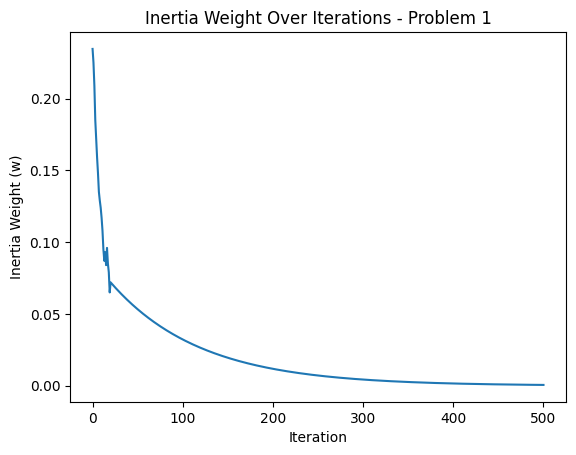

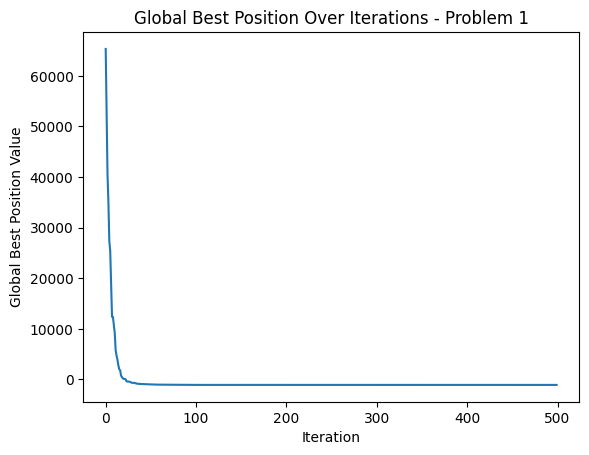




Problem 2 Best Cost: [-701.37502153 -701.40726322 -701.43113414 -701.46691666 -701.48211536
 -701.51536996 -701.54050505 -701.56066739 -701.57403952 -701.57403952
 -701.60784812 -701.62703391 -701.6333021  -701.65867332 -701.67330351
 -701.67330351 -701.68123382 -701.68664653 -701.69347394 -701.70344818
 -701.70770907 -701.73263189 -701.73263189 -701.73263189 -701.74842281
 -701.75799835 -701.76301387 -701.76963387 -701.78098661 -701.81432518
 -701.81432518 -701.81889811 -701.81889811 -701.81889811 -701.82188296
 -701.82188296 -701.83801319 -701.84037098 -701.84037098 -701.84037098
 -701.85465663 -701.86071249 -701.86071249 -701.86071249 -701.86071249
 -701.86520891 -701.87360004 -701.89170021 -701.89170021 -701.89170021
 -701.89170021 -701.90479143 -701.91007527 -701.91007527 -701.92129428
 -701.92129428 -701.93114468 -701.95844511 -701.95844511 -701.95844511
 -701.95844511 -701.96018555 -701.96018555 -701.963969   -701.96417221
 -701.96532421 -701.96647529 -701.98764739 -701.98764

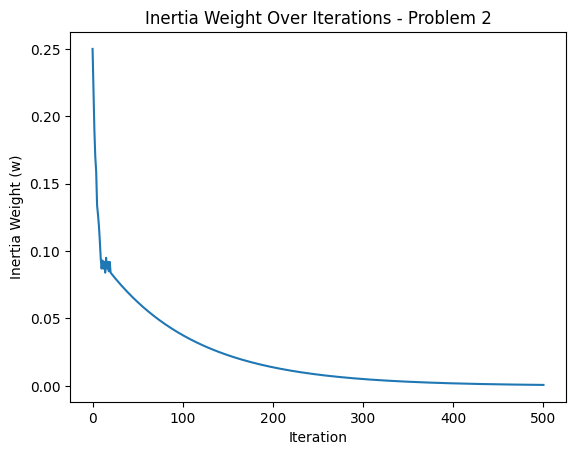

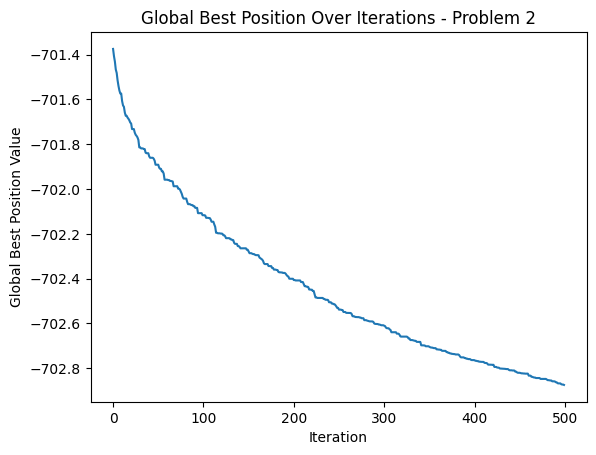




Problem 3 Best Cost: [ 3.32855824e+10  2.53398481e+10  2.06440560e+10  1.60940343e+10
  1.25943915e+10  9.23999213e+09  5.53622047e+09  5.21990135e+09
  4.57288605e+09  3.96915046e+09  2.83463033e+09  2.20657634e+09
  1.52723657e+09  1.50462651e+09  1.27749206e+09  9.17911487e+08
  7.53455806e+08  6.19185877e+08  6.19185877e+08  4.99403614e+08
  4.99403614e+08  4.18388265e+08  4.18388265e+08  3.99228410e+08
  3.93763327e+08  3.93763327e+08  3.21423908e+08  3.08789451e+08
  3.08789451e+08  3.08789451e+08  2.59266400e+08  2.18053423e+08
  2.18053423e+08  1.99442062e+08  1.99442062e+08  1.68560777e+08
  1.52833746e+08  1.52833746e+08  1.52833746e+08  1.47903997e+08
  1.24704138e+08  1.24704138e+08  1.24704138e+08  1.15061941e+08
  1.15061941e+08  1.06356171e+08  1.06356171e+08  8.47297944e+07
  8.19224975e+07  6.94360106e+07  6.94360106e+07  5.88382936e+07
  5.48593706e+07  5.48593706e+07  5.34690800e+07  5.34690800e+07
  5.17727112e+07  5.00253078e+07  4.22651974e+07  4.22651974e+07
 

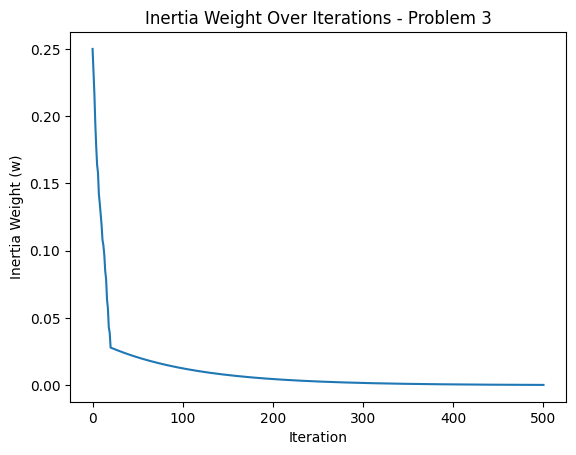

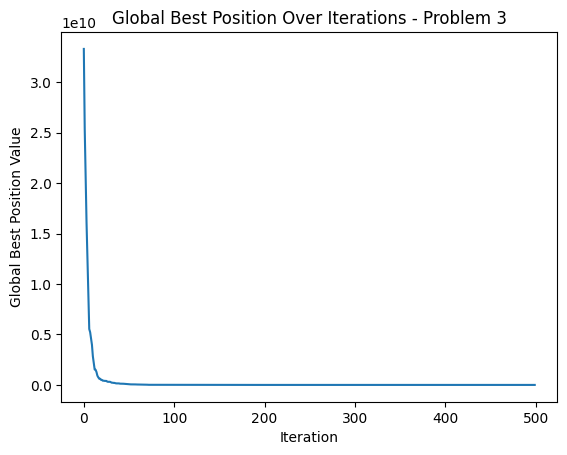




Problem 4 Best Cost: [ 2.63739714e+05  1.88558759e+05  9.82527884e+04  8.64983475e+04
  5.29138226e+04  4.17820297e+04  3.36393832e+04  2.61131368e+04
  1.92982833e+04  1.82188728e+04  1.30898354e+04  1.30898354e+04
  1.25834926e+04  9.35180485e+03  8.42882357e+03  3.70504599e+03
  3.70504599e+03  3.70504599e+03  3.51910215e+03  3.51910215e+03
  3.37493016e+03  3.34033032e+03  3.18073237e+03  3.12511778e+03
  2.14087555e+03  2.13237899e+03  2.13237899e+03  2.00989521e+03
  1.92958974e+03  1.77056608e+03  1.50188430e+03  1.50188430e+03
  1.50188430e+03  1.48001096e+03  1.05463085e+03  1.05463085e+03
  1.03005186e+03  1.03005186e+03  9.79807649e+02  9.79807649e+02
  9.79807649e+02  9.50456500e+02  6.86009369e+02  6.86009369e+02
  6.86009369e+02  5.64944005e+02  5.64944005e+02  5.55741883e+02
  5.16977196e+02  4.69639666e+02  4.69639666e+02  4.31364973e+02
  4.19507801e+02  4.19507801e+02  4.09753812e+02  4.09753812e+02
  3.02721781e+02  2.63447124e+02  2.63447124e+02  2.63447124e+02
 

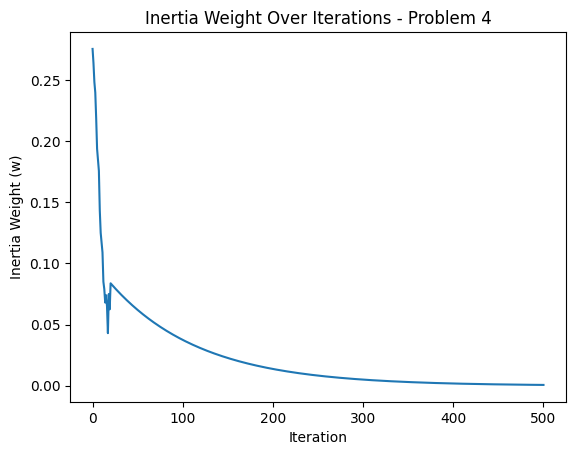

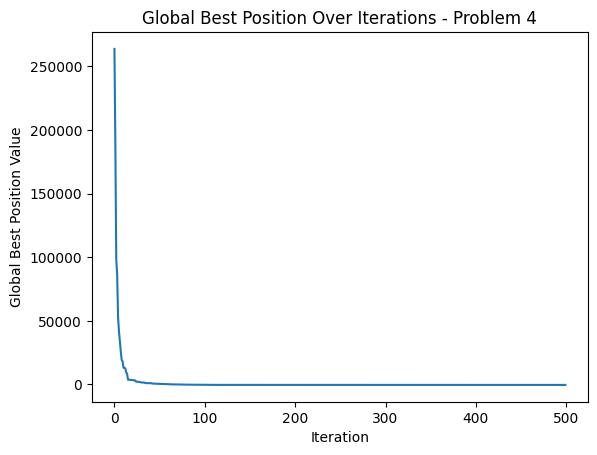




Problem 5 Best Cost: [-334.17651506 -334.24256385 -334.28166607 -334.32574818 -334.39299541
 -334.44523756 -334.50335333 -334.51846717 -334.53818731 -334.56728469
 -334.62341456 -334.62341456 -334.63636213 -334.66242146 -334.67481744
 -334.68669838 -334.72238859 -334.72478543 -334.7490149  -334.7490149
 -334.7490149  -334.76096597 -334.78035295 -334.79973342 -334.80480755
 -334.8231151  -334.8231151  -334.8231151  -334.83037657 -334.832258
 -334.832258   -334.85731105 -334.86433949 -334.87069869 -334.87069869
 -334.90177382 -334.91649245 -334.91649245 -334.91649245 -334.92018427
 -334.93286441 -334.95615861 -334.95615861 -334.95787946 -334.9786433
 -334.98308741 -334.99560836 -334.99560836 -334.99560836 -335.01336827
 -335.01336827 -335.01336827 -335.01336827 -335.03564923 -335.03564923
 -335.03564923 -335.03819417 -335.05807694 -335.0865082  -335.08888231
 -335.10132609 -335.12208795 -335.17350955 -335.17350955 -335.17350955
 -335.17350955 -335.18630374 -335.1933702  -335.21350437 

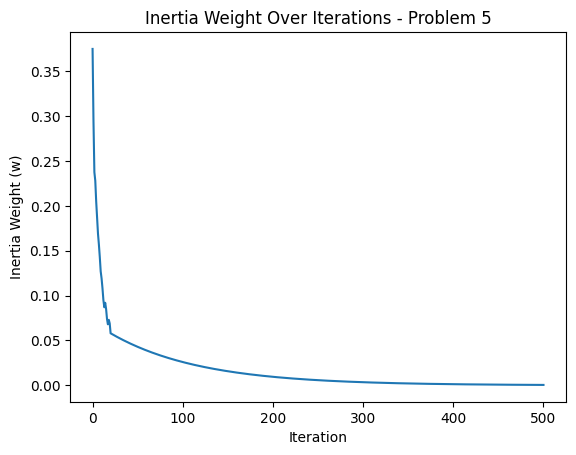

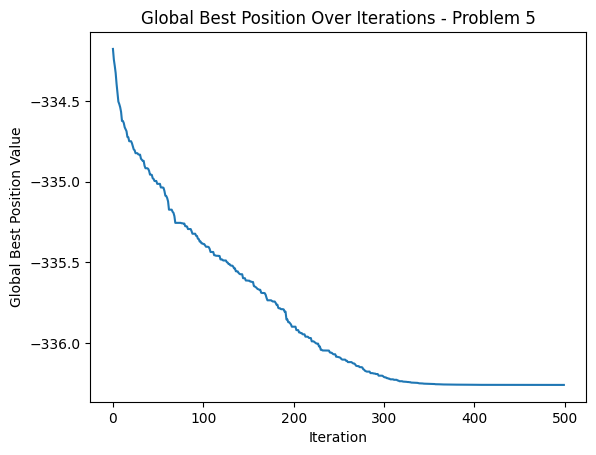




Problem 6 Best Cost: [-183.49056922 -183.5587103  -183.60687587 -183.65992712 -183.70414731
 -183.75284484 -183.82287527 -183.84109677 -183.88691283 -183.90385071
 -183.93748403 -183.93748403 -183.95164161 -183.98849303 -184.02529838
 -184.03117553 -184.05704019 -184.05704019 -184.05704019 -184.06335262
 -184.08567113 -184.08567113 -184.16146387 -184.18030298 -184.18401678
 -184.19865936 -184.19865936 -184.21316167 -184.21316167 -184.26992467
 -184.26992467 -184.26992467 -184.27375394 -184.28430746 -184.28430746
 -184.28664923 -184.29112495 -184.31636789 -184.31636789 -184.35111281
 -184.35111281 -184.35111281 -184.35378828 -184.3632574  -184.3865408
 -184.3865408  -184.3865408  -184.38799811 -184.38799811 -184.38799811
 -184.38799811 -184.38799811 -184.3887525  -184.3887525  -184.39944369
 -184.39944369 -184.43358703 -184.43358703 -184.43358703 -184.43358703
 -184.43358703 -184.44859041 -184.44859041 -184.44859041 -184.44859041
 -184.44859041 -184.44859041 -184.45705977 -184.460032

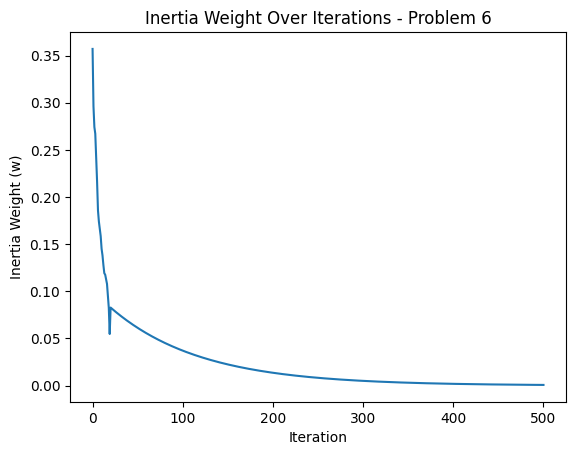

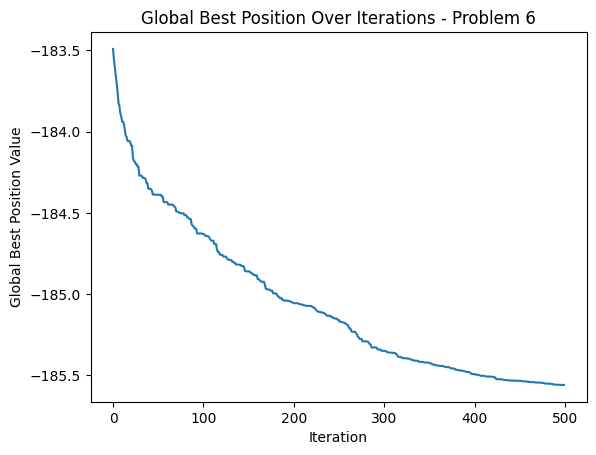




Problem 7 Best Cost: [52320.31991058 52320.31991058 45319.43766561 31357.39227642
 26940.67233143 23402.92609358 20871.63477382 18477.64338314
 18477.64338314 15029.90936812 15029.90936812 15029.90936812
 15029.90936812 14634.89299932 14287.94749527 14287.94749527
 14287.94749527 11691.48735812  9811.10796733  9811.10796733
  9811.10796733  9811.10796733  9484.06415962  9484.06415962
  8847.74093058  8847.74093058  8847.74093058  8479.57404341
  8479.57404341  8479.57404341  7823.62274138  7655.35118763
  7655.35118763  7552.25306689  7552.25306689  7374.01774698
  7374.01774698  6852.59510128  6852.59510128  6852.59510128
  6852.59510128  6556.64076457  6539.74341014  6244.60394651
  6120.37320116  6120.37320116  5920.77790746  5915.73188527
  5831.63763624  5831.63763624  5637.45655451  5637.45655451
  5637.45655451  5637.45655451  5120.92295739  5120.92295739
  5120.92295739  5079.93243345  5010.26301399  4846.40442526
  4335.00330604  3901.38846754  3901.38846754  3901.38846754


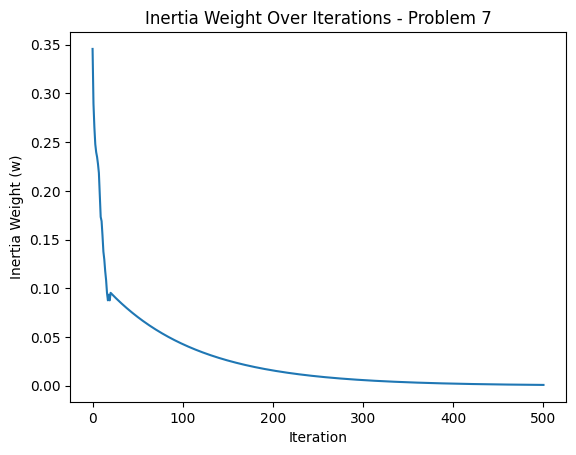

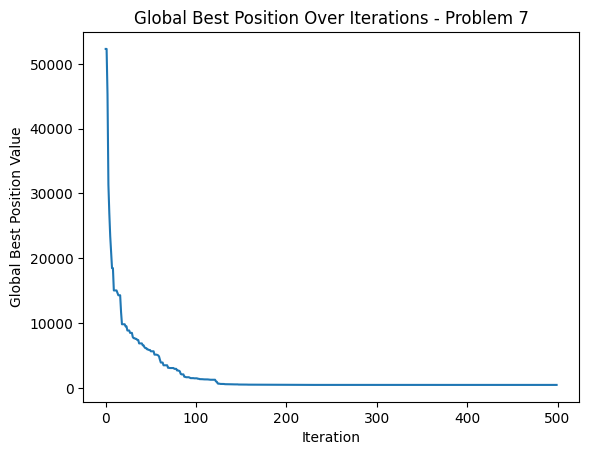




Problem 8 Best Cost: [ 5.45213872e+04  2.27125428e+04  2.27125428e+04  2.27125428e+04
  2.27125428e+04  1.99728241e+04  1.99728241e+04  1.99728241e+04
  1.59497378e+04  1.38421011e+04  1.29263203e+04  8.85657997e+03
  8.85657997e+03  8.85657997e+03  8.85657997e+03  7.99412561e+03
  7.99412561e+03  6.86923690e+03  6.86923690e+03  6.86923690e+03
  6.36380709e+03  5.06943411e+03  2.44728742e+03  2.44728742e+03
  2.44728742e+03  2.44728742e+03  2.44728742e+03  1.64737842e+03
  1.64737842e+03  1.22134664e+03  7.18684651e+02  3.97464263e+02
  3.97464263e+02  3.83447360e+02  3.83447360e+02  1.48397219e+02
  1.48397219e+02  7.60906000e+01  9.78056942e+00  9.78056942e+00
  9.78056942e+00 -1.16825196e+02 -1.16825196e+02 -1.16825196e+02
 -1.16825196e+02 -1.16825196e+02 -1.16825196e+02 -3.00858389e+02
 -3.00858389e+02 -3.00858389e+02 -3.00858389e+02 -3.72446556e+02
 -3.86653907e+02 -3.86653907e+02 -3.86653907e+02 -3.86653907e+02
 -4.00499292e+02 -4.18764456e+02 -4.65857373e+02 -4.65857373e+02
 

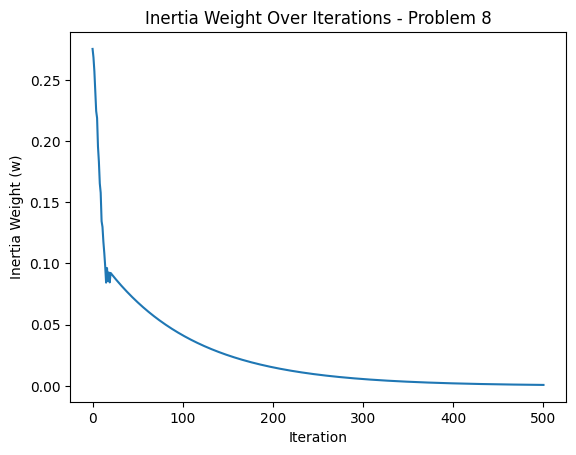

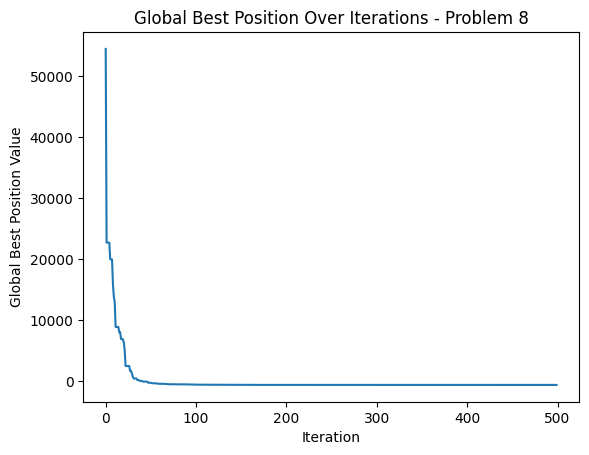




Problem 9 Best Cost: [ 2.27757775e+05  1.18250983e+05  1.18250983e+05  9.32248745e+04
  9.32248745e+04  9.32248745e+04  8.54904210e+04  8.54904210e+04
  8.54904210e+04  8.29732970e+04  4.30213553e+04  4.30213553e+04
  4.30213553e+04  4.30213553e+04  4.30213553e+04  4.30213553e+04
  3.64628282e+04  3.64628282e+04  3.64628282e+04  3.64628282e+04
  3.08977299e+04  1.95871943e+04  1.95871943e+04  1.95871943e+04
  1.95871943e+04  1.95871943e+04  1.95871943e+04  1.95871943e+04
  1.95871943e+04  1.95871943e+04  1.95871943e+04  1.95871943e+04
  1.95871943e+04  1.95871943e+04  1.95871943e+04  1.95871943e+04
  1.95871943e+04  1.95871943e+04  1.95871943e+04  1.95871943e+04
  1.95871943e+04  1.95871943e+04  1.95871943e+04  1.84708994e+04
  1.84708994e+04  3.82822902e+03  3.82822902e+03  3.82822902e+03
  3.82822902e+03  3.82822902e+03  3.44233721e+03  3.44233721e+03
  3.44233721e+03  3.44233721e+03  3.44233721e+03  3.44233721e+03
  3.44233721e+03  3.44233721e+03  3.44233721e+03  3.44233721e+03
 

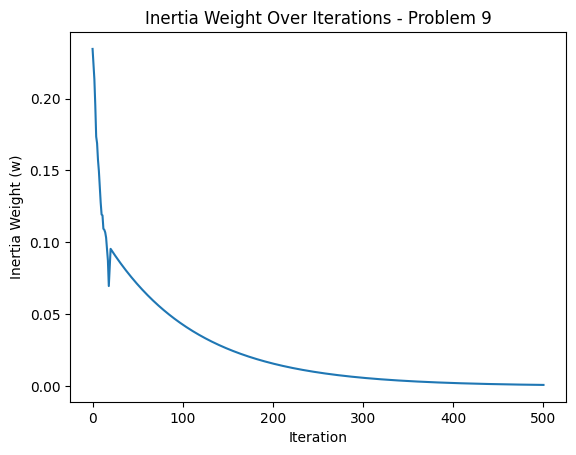

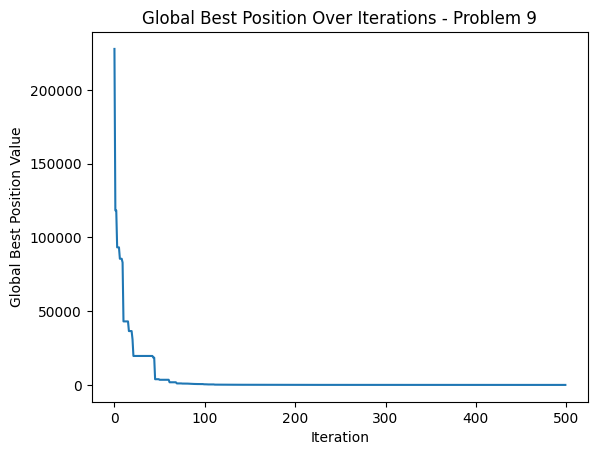




Problem 10 Best Cost: [67320.08045877 51282.79599296 37032.65489668 31834.73401045
 31834.73401045 21039.14497826 21039.14497826 21039.14497826
 21039.14497826 21039.14497826 21039.14497826 16855.88699438
 16855.88699438 16801.83746992 15718.56843981 14179.7241328
 14179.7241328  14179.7241328  13587.23052652 13587.23052652
 13587.23052652 13587.23052652 10858.69095565 10858.69095565
 10792.97332612 10792.97332612 10792.97332612 10792.97332612
 10038.41212277 10038.41212277  9068.59100143  9068.59100143
  8172.2182844   8172.2182844   8172.2182844   8172.2182844
  8172.2182844   8172.2182844   8172.2182844   8172.2182844
  8172.2182844   8172.2182844   8172.2182844   7811.63148856
  7753.73069605  7753.73069605  7249.84393332  7249.84393332
  7119.06376125  7119.06376125  7119.06376125  7119.06376125
  7119.06376125  7119.06376125  6829.22938964  6693.31239317
  6599.81142713  6599.81142713  6599.81142713  6599.81142713
  6599.81142713  6599.81142713  6599.81142713  6599.81142713
  

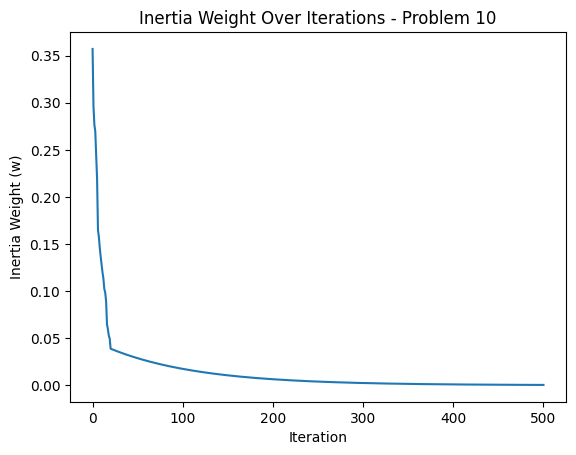

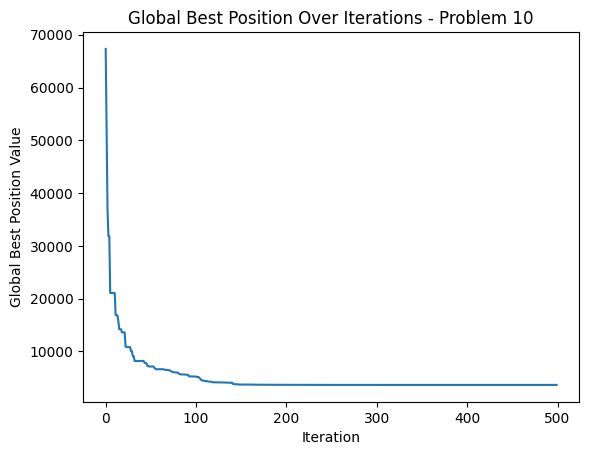




Problem 11 Best Cost: [72668.80698142 66547.06571422 48463.47146093 31679.86725395
 25118.24858724 25067.43274887 18679.09781882 13370.10253072
 11979.09899606 10829.69106416 10074.02360337  7093.01754475
  5497.5507778   5497.5507778   3238.76065721  3238.76065721
  2244.91639071  2244.91639071  2244.91639071  2244.91639071
  2244.91639071  2244.91639071  2244.91639071  1635.46428408
  1635.46428408  1635.46428408  1635.46428408  1635.46428408
  1635.46428408  1635.46428408  1635.46428408  1635.46428408
  1635.46428408  1635.46428408  1635.46428408  1635.46428408
  1635.46428408  1635.46428408  1635.46428408  1635.46428408
  1635.46428408  1635.46428408  1635.46428408  1635.46428408
  1635.46428408  1444.42933528  1427.98638567  1402.0264048
  1402.0264048   1402.0264048   1255.52255956  1255.52255956
  1255.52255956  1255.52255956  1196.30139869  1157.51312752
  1157.51312752  1140.59073693  1140.59073693  1140.59073693
  1059.93375177  1059.93375177  1059.93375177  1059.93375177


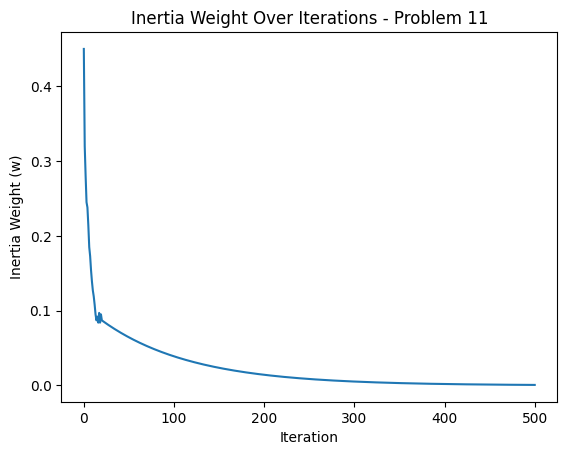

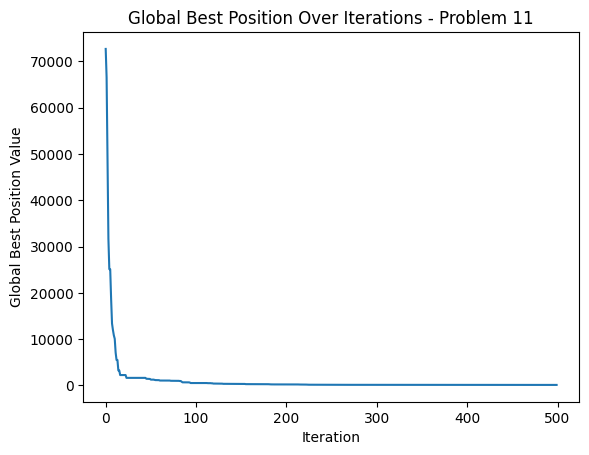




Problem 12 Best Cost: [71608.39602024 47004.8134994  44628.66310706 35974.45803219
 32359.22745481 31425.3731284  31425.3731284  31425.3731284
 26641.5375945  26641.5375945  26641.5375945  26272.68487921
 26272.68487921 26272.68487921 22339.929376   22339.929376
 22339.929376   22339.929376   22339.929376   22339.929376
 21060.11445427 21060.11445427 21060.11445427 20825.48396828
 20825.48396828 18236.01358219 18236.01358219 18236.01358219
 18236.01358219 18236.01358219 18236.01358219 18236.01358219
 18236.01358219 18236.01358219 16390.20165493 16390.20165493
 15481.01708893 15481.01708893 15481.01708893 14338.23722238
 14338.23722238 14338.23722238 14338.23722238 14338.23722238
 14338.23722238 14338.23722238 14338.23722238 14338.23722238
 14338.23722238 14338.23722238 13877.75023785 13877.75023785
 13877.75023785 13877.75023785 13877.75023785 13721.42082813
 13721.42082813 13437.43009758 13189.48719019 12989.14047069
 12775.49763229 12775.49763229 12775.49763229 12682.72104095
 125

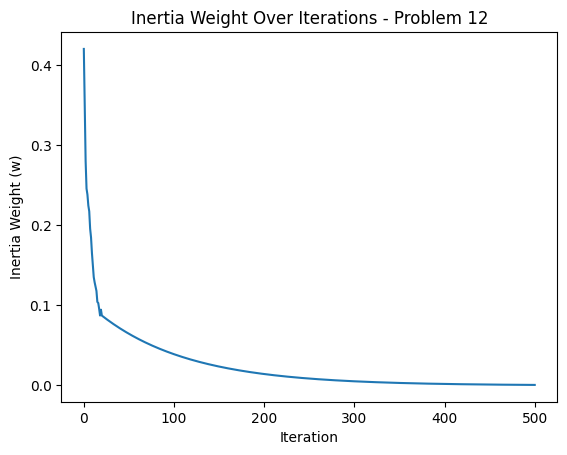

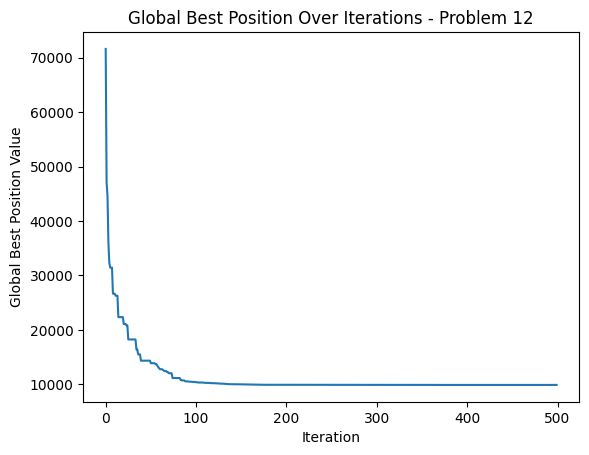




Problem 13 Best Cost: [265701.97966772 184259.87844892 172690.36988213  91929.04518861
  91929.04518861  91929.04518861  90249.45602571  66309.35049877
  66309.35049877  66309.35049877  66309.35049877  66309.35049877
  66309.35049877  22958.31126187  22958.31126187  22958.31126187
  22958.31126187  22958.31126187  22958.31126187  22958.31126187
  22958.31126187  22958.31126187  22958.31126187  22958.31126187
  22958.31126187  22958.31126187  22958.31126187  22958.31126187
  22958.31126187  22958.31126187  22958.31126187  22958.31126187
  22958.31126187  22958.31126187  22958.31126187  22958.31126187
  22958.31126187  22958.31126187  22958.31126187  22958.31126187
  22958.31126187  22958.31126187  22958.31126187  22958.31126187
  22958.31126187  22958.31126187  22958.31126187  22958.31126187
  22958.31126187  22958.31126187  22804.08686607  19860.41515184
  19860.41515184  19860.41515184  19860.41515184  19860.41515184
  19860.41515184  19860.41515184  12330.85933409  12330.85933409


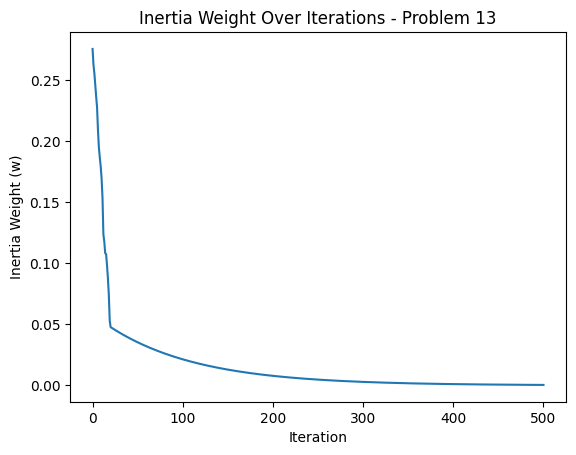

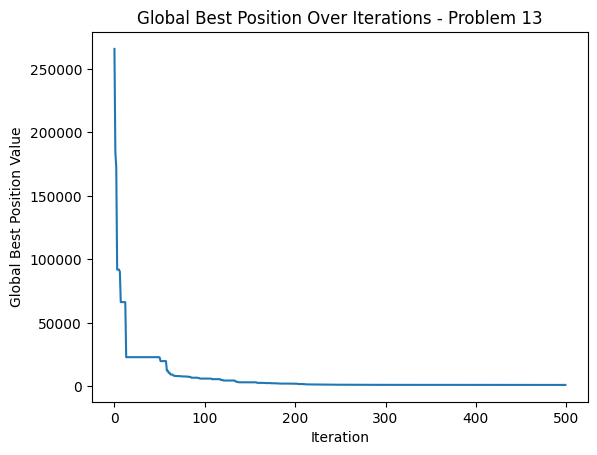




Problem 14 Best Cost: [35431.90799559 31837.52150661 27443.71124053 24429.01160932
 24305.90261997 19920.82020612 19201.72100711 19089.75157358
 19089.75157358 19089.75157358 19089.75157358 19089.75157358
 19089.75157358 19089.75157358 19089.75157358 18466.54989482
 18466.54989482 16656.91360319 16656.91360319 16656.91360319
 16656.91360319 16656.91360319 16656.91360319 16656.91360319
 16656.91360319 16656.91360319 16180.99118342 16180.99118342
 16180.99118342 16180.99118342 16180.99118342 16180.99118342
 16180.99118342 15864.61341758 15864.61341758 15864.61341758
 15864.61341758 15864.61341758 15864.61341758 15864.61341758
 15864.61341758 15864.61341758 15864.61341758 15864.61341758
 15790.71613807 15782.78552898 15339.05069763 15339.05069763
 15339.05069763 15267.72938697 15267.72938697 15267.72938697
 15250.7558397  15225.9889858  15183.78598027 15183.78598027
 15183.78598027 15149.05333345 15149.05333345 15001.6879523
 15001.6879523  14884.3399651  14884.3399651  14852.51082824


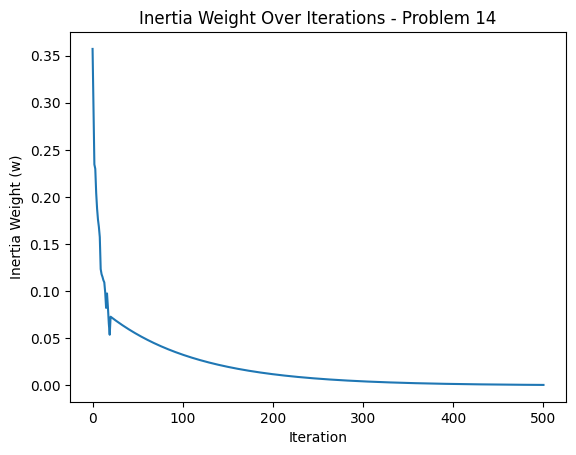

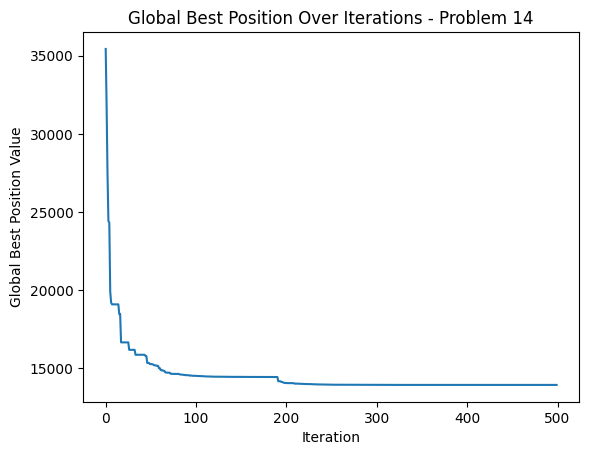




Problem 15 Best Cost: [-224.72102207 -224.84707335 -224.84707335 -225.04092163 -225.04092163
 -225.04092163 -225.67953926 -225.76992002 -225.76992002 -225.87571048
 -225.87571048 -226.0139656  -226.32920376 -226.40577124 -226.40577124
 -226.40577124 -226.40577124 -226.55279146 -226.55279146 -226.55279146
 -226.84150973 -226.84150973 -226.84150973 -226.93906427 -226.93906427
 -226.93906427 -226.93906427 -227.29840561 -227.29840561 -227.29840561
 -227.29840561 -227.29840561 -227.29840561 -227.42506597 -227.42506597
 -227.42506597 -227.42506597 -227.42506597 -227.42506597 -227.42506597
 -227.42506597 -227.42506597 -227.42506597 -227.42506597 -227.42506597
 -227.42506597 -227.6191039  -227.6191039  -227.6386973  -227.6386973
 -227.69363011 -227.71491127 -227.7800891  -227.7800891  -227.7800891
 -227.7800891  -227.7800891  -227.7800891  -227.7800891  -227.7800891
 -227.82227654 -227.83478913 -227.83478913 -227.83595993 -227.83595993
 -227.87142894 -227.89592803 -227.89592803 -227.8959280

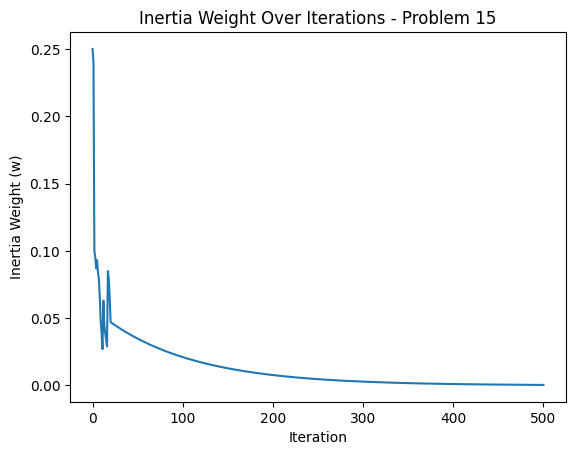

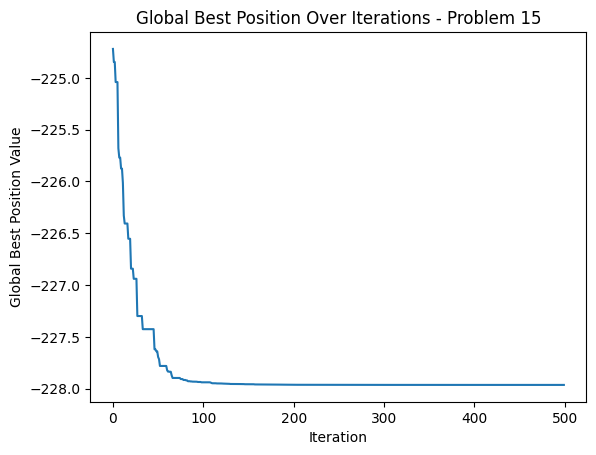




Problem 16 Best Cost: [ 5.25740858e+04  4.30518960e+04  2.94632705e+04  2.73988104e+04
  1.71630760e+04  7.91909317e+03  6.01406206e+03  3.48783571e+03
  3.48783571e+03  1.35647566e+03  8.35411292e+02  4.28924398e+01
 -1.33691396e+03 -2.69215338e+03 -3.12802818e+03 -3.14300633e+03
 -3.20476835e+03 -3.26918262e+03 -3.27171250e+03 -3.27171250e+03
 -3.38273988e+03 -3.82701526e+03 -3.82701526e+03 -3.83415831e+03
 -3.83415831e+03 -3.83415831e+03 -3.83415831e+03 -3.83415831e+03
 -3.90207793e+03 -3.90207793e+03 -3.90207793e+03 -4.02471385e+03
 -4.08331223e+03 -4.10368752e+03 -4.10368752e+03 -4.14471129e+03
 -4.14471129e+03 -4.14471129e+03 -4.14471129e+03 -4.14471129e+03
 -4.14471129e+03 -4.17118171e+03 -4.17118171e+03 -4.17154494e+03
 -4.20059635e+03 -4.21931845e+03 -4.21931845e+03 -4.24025342e+03
 -4.24025342e+03 -4.24025342e+03 -4.24025342e+03 -4.24025342e+03
 -4.24025342e+03 -4.24673424e+03 -4.25147267e+03 -4.25147267e+03
 -4.25586728e+03 -4.25586728e+03 -4.26179105e+03 -4.26179105e+03


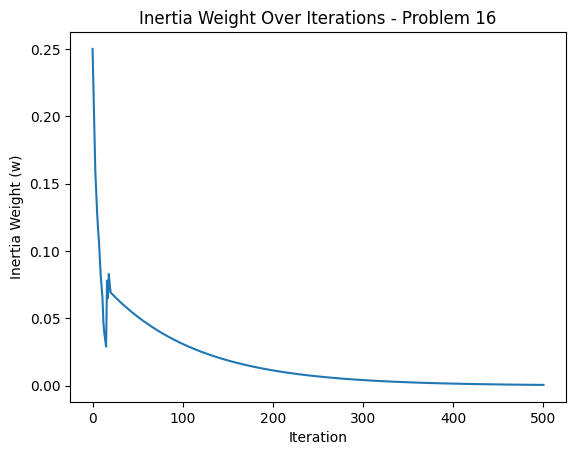

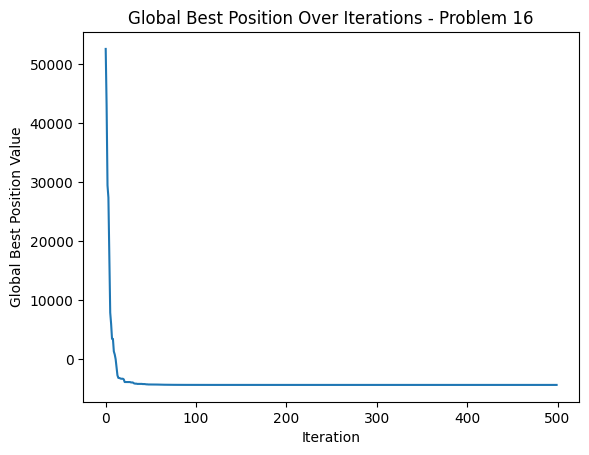




Problem 17 Best Cost: [ 2.86208731e+06  2.86208731e+06  2.00292062e+06  1.52632417e+06
  1.11787075e+06  7.55764529e+05  4.75595518e+05  4.18313788e+05
  3.26409051e+05  2.96346794e+05  2.31378001e+05  1.83837511e+05
  1.71864527e+05  1.09163943e+05  1.09163943e+05  1.09163943e+05
  9.29883698e+04  7.19381420e+04  6.95753992e+04  6.52157844e+04
  6.05762842e+04  5.79085011e+04  5.14857026e+04  5.14857026e+04
  3.42882107e+04  3.42882107e+04  3.42882107e+04  3.37545328e+04
  2.52444641e+04  2.52444641e+04  2.03641814e+04  2.02868772e+04
  2.02868772e+04  2.02868772e+04  2.02868772e+04  1.89735299e+04
  1.89735299e+04  1.89735299e+04  1.64980199e+04  1.56931813e+04
  1.56931813e+04  1.56931813e+04  1.30695435e+04  1.21730920e+04
  1.14859246e+04  1.14859246e+04  1.14859246e+04  1.10549457e+04
  1.04085927e+04  1.03491719e+04  9.78128106e+03  8.07194451e+03
  8.07194451e+03  6.17428405e+03  5.45129651e+03  5.40967602e+03
  5.03206548e+03  4.73756328e+03  4.73756328e+03  4.22976769e+03


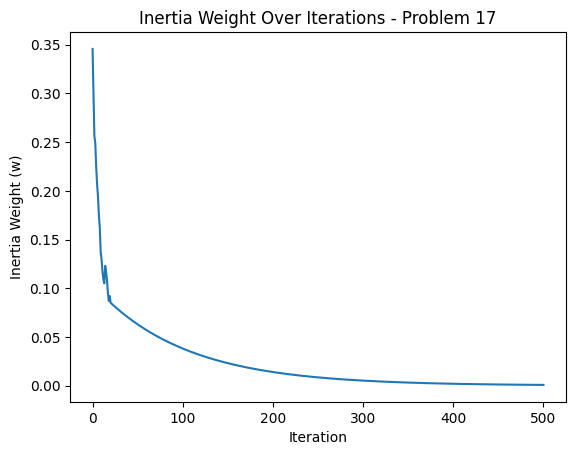

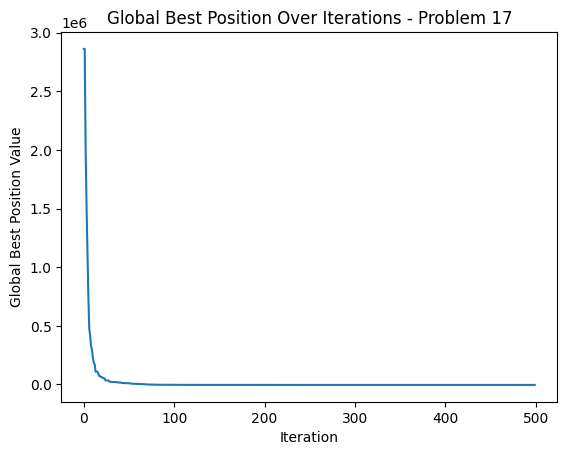




Problem 18 Best Cost: [50743.34418462 50743.34418462 48998.38695681 38707.54041858
 38707.54041858 38707.54041858 35374.2403936  30588.26311905
 29446.9707158  22846.51040827 22846.51040827 22846.51040827
 22846.51040827 22846.51040827 22846.51040827 22846.51040827
 22846.51040827 22846.51040827 22846.51040827 22103.53064657
 22103.53064657 20417.93151536 20417.93151536 20417.93151536
 20417.93151536 20417.93151536 20417.93151536 20417.93151536
 20417.93151536 20417.93151536 20417.93151536 20417.93151536
 18093.24279707 18093.24279707 18093.24279707 17647.94496456
 17647.94496456 17647.94496456 17647.94496456 17647.94496456
 17647.94496456 17073.30294681 17073.30294681 17073.30294681
 16532.25584119 16505.66600365 16505.66600365 16079.99436773
 16079.99436773 16079.99436773 15957.55112858 15957.55112858
 15957.55112858 15957.55112858 15957.55112858 15957.55112858
 15957.55112858 15562.88062588 15562.88062588 15562.88062588
 15328.21340757 15328.21340757 15328.21340757 15328.21340757

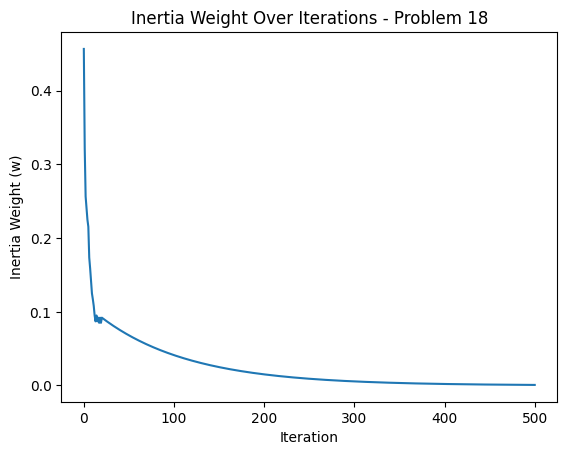

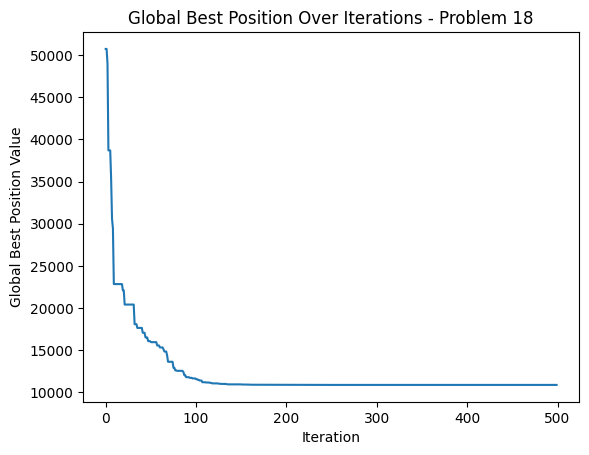




Problem 19 Best Cost: [48393.58960943 37656.12344569 37656.12344569 32955.80337417
 32955.80337417 32955.80337417 32955.80337417 32955.80337417
 31376.75662834 25273.60793782 25273.60793782 25273.60793782
 25273.60793782 25273.60793782 25273.60793782 25273.60793782
 25273.60793782 25273.60793782 25273.60793782 25273.60793782
 25273.60793782 23560.34908985 23560.34908985 23560.34908985
 23560.34908985 23560.34908985 23560.34908985 23560.34908985
 23560.34908985 23560.34908985 23560.34908985 23560.34908985
 23560.34908985 23560.34908985 23560.34908985 23560.34908985
 23560.34908985 23560.34908985 23560.34908985 23560.34908985
 23560.34908985 23560.34908985 23560.34908985 23560.34908985
 23560.34908985 23560.34908985 23560.34908985 23560.34908985
 23560.34908985 23560.34908985 23560.34908985 23560.34908985
 23560.34908985 23560.34908985 23560.34908985 23560.34908985
 23560.34908985 23560.34908985 23164.19790838 15552.95376499
 15552.95376499 15552.95376499 15552.95376499 15552.95376499

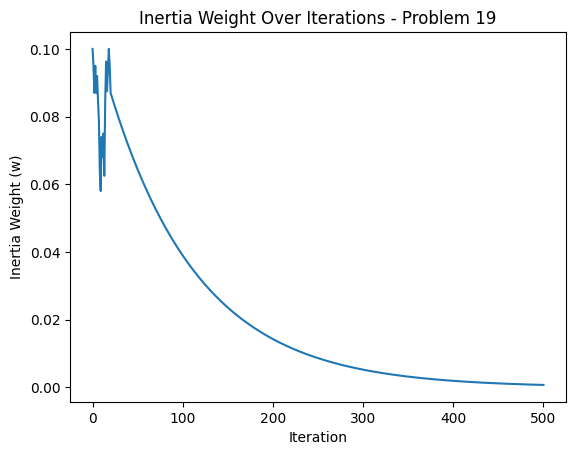

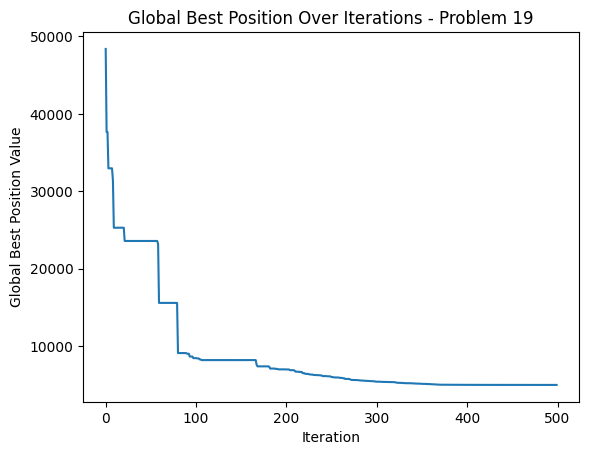




Problem 20 Best Cost: [-83.17067413 -83.7411073  -84.67429559 -84.89118933 -85.9600358
 -85.9600358  -86.25062161 -86.49779967 -86.79808765 -87.160541
 -87.160541   -87.65615256 -87.65615256 -87.7499488  -88.06236818
 -88.06236818 -88.06236818 -88.06236818 -88.55075024 -88.55075024
 -88.55075024 -88.67418328 -88.67418328 -88.67418328 -88.97014895
 -88.97014895 -88.97014895 -88.97014895 -88.97014895 -88.97014895
 -88.97014895 -88.98202062 -89.03018137 -89.03018137 -89.03018137
 -89.03018137 -89.05235892 -89.22116541 -89.89999595 -89.89999595
 -89.89999595 -89.89999595 -89.89999595 -89.89999595 -89.89999595
 -89.89999595 -89.89999595 -89.89999595 -89.89999595 -89.89999595
 -89.89999595 -89.89999595 -89.89999595 -89.89999595 -89.89999595
 -89.95038299 -89.95038299 -89.95038299 -89.95038299 -89.95038299
 -89.95038299 -89.95038299 -89.95038299 -89.95038299 -89.95038299
 -89.95038299 -89.95038299 -89.95038299 -89.95038299 -89.99158844
 -89.99158844 -89.99158844 -89.99158844 -90.03664837 -

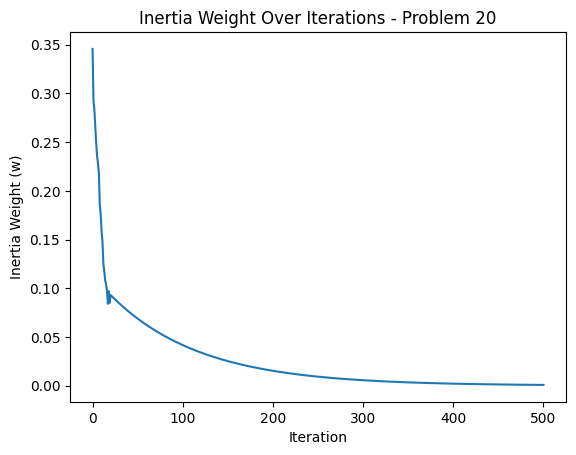

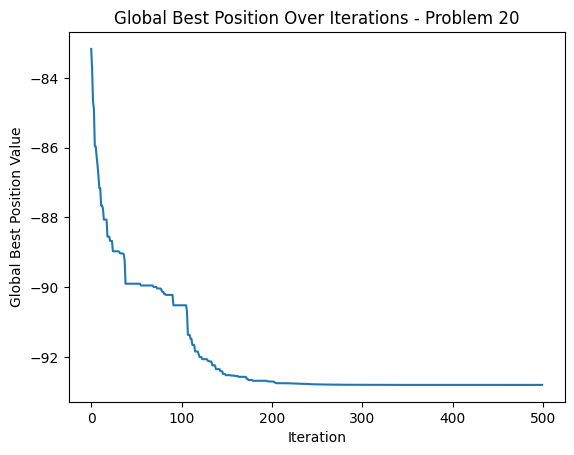




Problem 21 Best Cost: [165.01338635  98.80382769  58.12088089  27.76179924  19.95166512
  19.6905779   17.12647654   9.01100722   9.01100722   2.49181722
   2.49181722  -0.43788248  -0.43788248  -6.15557446  -6.15557446
 -12.66092403 -12.66092403 -12.66092403 -12.708627   -12.708627
 -15.78774081 -15.78774081 -15.78774081 -19.61080399 -19.61080399
 -19.61080399 -19.61080399 -20.38069633 -21.5121063  -22.64460539
 -25.40164247 -25.40164247 -25.40164247 -25.50023737 -25.50023737
 -25.50023737 -26.84218581 -27.18507885 -27.18507885 -27.18507885
 -27.62376661 -28.56463432 -28.65050507 -28.65050507 -29.03218539
 -29.03218539 -29.03218539 -29.92534507 -30.46510822 -30.59878894
 -30.8273994  -32.40197988 -32.45670292 -32.45670292 -33.12275546
 -33.12275546 -33.69243076 -33.69243076 -33.92326185 -35.35939002
 -35.35939002 -35.35939002 -35.35939002 -35.35939002 -35.35939002
 -35.35939002 -35.35939002 -35.94783162 -36.83547719 -36.83547719
 -36.83547719 -37.04439402 -37.04439402 -37.04439402 

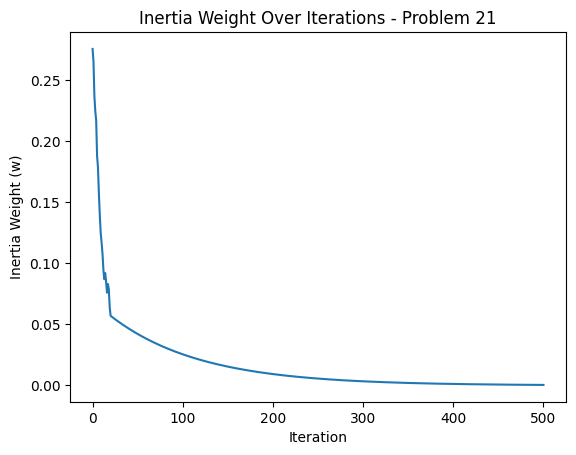

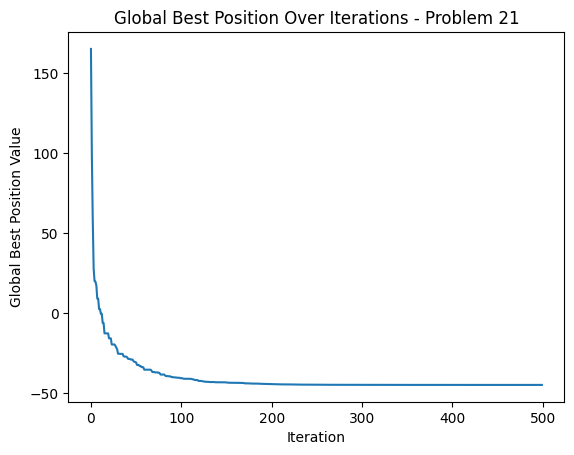




Problem 22 Best Cost: [263123.87890415 218708.93299681 184502.25848174 181732.01716042
 132080.76084855 132080.76084855 132080.76084855 132080.76084855
 132080.76084855 132080.76084855 132080.76084855 132080.76084855
 132080.76084855 132080.76084855 132080.76084855 132080.76084855
 132080.76084855 132080.76084855 132080.76084855 132080.76084855
 132080.76084855 132080.76084855 132080.76084855 132080.76084855
 132080.76084855 132080.76084855 109283.03450959 109283.03450959
 109283.03450959 109283.03450959 101474.61761629 101474.61761629
 101474.61761629 101474.61761629 101474.61761629 101474.61761629
  95653.97775834  95653.97775834  95653.97775834  90851.17421543
  90851.17421543  90851.17421543  90275.6939556   90275.6939556
  90275.6939556   90275.6939556   81181.44663294  81181.44663294
  81181.44663294  81181.44663294  78207.58416513  78207.58416513
  76593.73798557  76593.73798557  76593.73798557  76593.73798557
  76593.73798557  74790.15616294  74790.15616294  74790.15616294
 

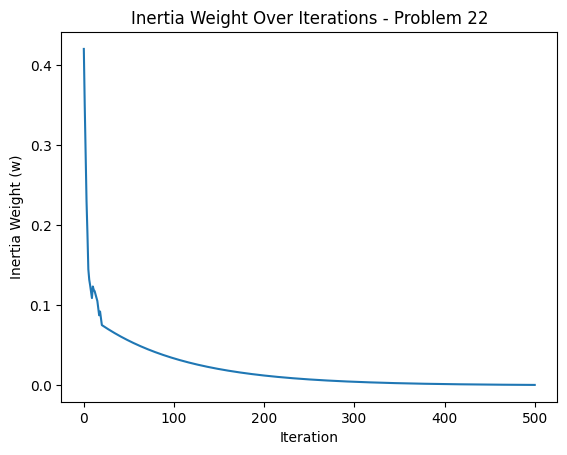

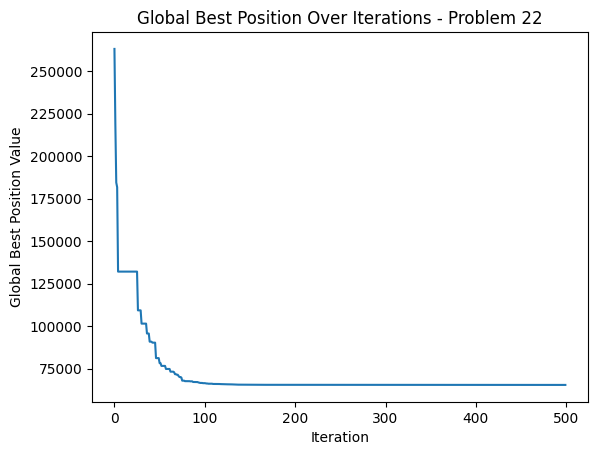




Problem 23 Best Cost: [-23.23837566 -31.99222728 -31.99222728 -36.70513226 -42.02654737
 -42.02654737 -42.02654737 -42.02654737 -42.02654737 -42.02654737
 -42.02654737 -42.02654737 -42.02654737 -46.01040423 -46.01040423
 -49.00002716 -49.00002716 -49.00002716 -49.00002716 -49.00002716
 -49.00002716 -51.17709107 -51.17709107 -51.17709107 -51.17709107
 -51.17709107 -51.17709107 -51.17709107 -51.17709107 -51.17709107
 -51.17709107 -51.17709107 -51.17709107 -51.17709107 -51.88603817
 -52.57150197 -52.57150197 -52.57150197 -52.81409197 -52.81409197
 -52.81409197 -52.81409197 -52.81409197 -52.81409197 -53.67712668
 -53.67712668 -54.35268446 -54.35268446 -54.35268446 -54.72140543
 -54.72140543 -54.72140543 -54.72140543 -54.72140543 -54.72140543
 -54.72140543 -54.72140543 -54.72140543 -54.72140543 -55.77526002
 -55.77526002 -56.67946373 -56.67946373 -56.67946373 -56.67946373
 -57.11478491 -57.13739313 -57.13739313 -57.13739313 -57.55870374
 -57.55870374 -57.76247704 -57.76247704 -57.7624770

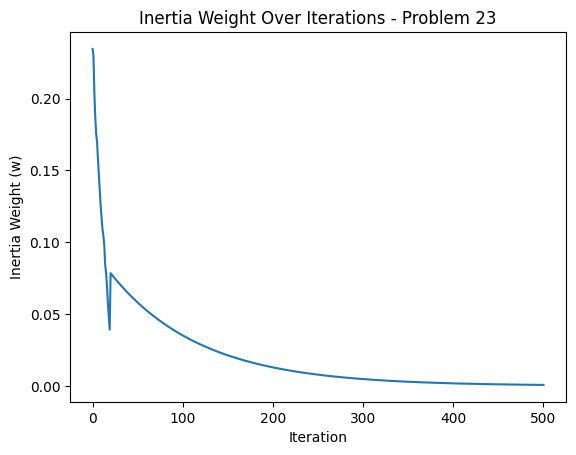

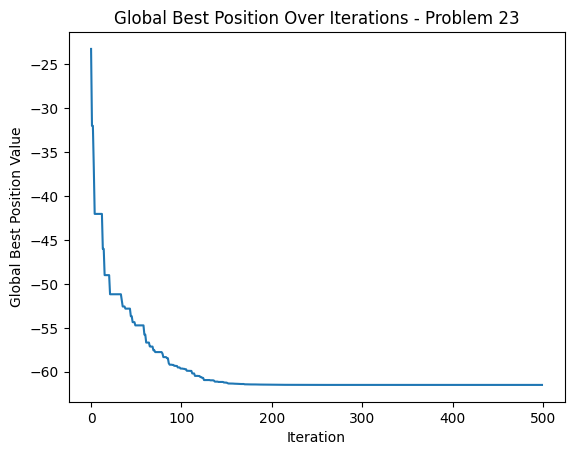




Problem 24 Best Cost: [113.95351103 113.95351103  96.01664871  95.34011302  80.52299782
  77.86585611  77.86585611  76.68990028  73.47195274  73.47195274
  64.47354619  64.47354619  64.47354619  64.47354619  64.47354619
  64.47354619  64.47354619  64.47354619  64.47354619  64.47354619
  64.47354619  64.47354619  63.65479984  59.48293755  57.58725804
  57.58725804  57.58725804  56.09800028  56.09800028  56.09800028
  56.09800028  56.09800028  56.09800028  54.88773878  50.26529827
  50.26529827  50.26529827  46.86593397  46.86593397  46.86593397
  46.86593397  46.86593397  46.86593397  46.86593397  46.86593397
  46.86593397  46.86593397  46.86593397  46.86593397  46.86593397
  46.86593397  46.86593397  46.86593397  46.86593397  46.86593397
  46.86593397  46.54300117  46.54300117  46.54300117  46.54300117
  46.54300117  46.54300117  43.01456617  43.01456617  43.01456617
  41.7707776   41.7707776   41.7707776   41.63558831  41.41218825
  41.41218825  41.41218825  41.41218825  41.4121882

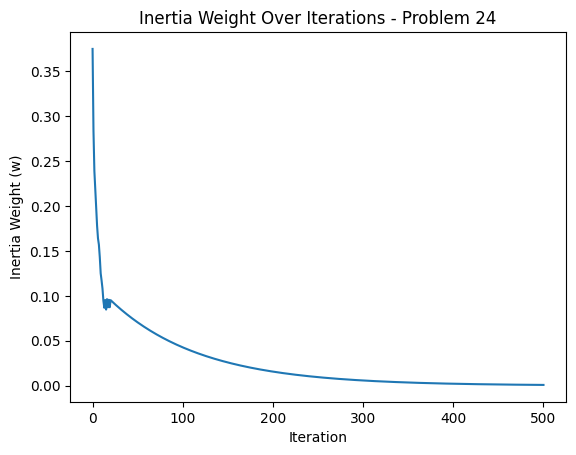

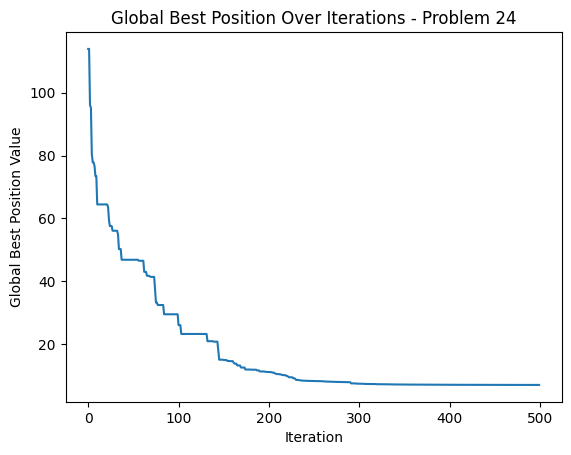

In [25]:
for prob in range(24):
    curr = prob + 1
    problem_results = results[curr]

    print("\n\n\nProblem", curr, "Best Cost:", problem_results['BestCost'])
    print("Problem", curr, "Best Position:", problem_results['BestPosition'])

    plt.plot(problem_results['w_values'])
    plt.xlabel('Iteration')
    plt.ylabel('Inertia Weight (w)')
    plt.title(f'Inertia Weight Over Iterations - Problem {curr}')
    plt.show()

    plt.plot(problem_results['g_values'])
    plt.xlabel('Iteration')
    plt.ylabel('Global Best Position Value')
    plt.title(f'Global Best Position Over Iterations - Problem {curr}')
    plt.show()

In [26]:
print('nice')

nice


In [27]:
print('almost complete')

almost complete


In [28]:
print("Don't disconnect runtime")

Don't disconnect runtime


In [29]:
print('ok')

ok
